In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statistics as sts
from scipy import stats
from datetime import datetime
plt.style.use("ggplot")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


__Change the "Date" Column type from string to datetime: Year-Month__

In [3]:
dateparse=lambda dates:datetime.strptime(dates,"%Y-%m")
outbreaks=pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/outbreaks2.csv",parse_dates=["Date"],date_parser=dateparse)

In [4]:
outbreaks

Unnamed: 0       Date       State  \
0               0 1998-01-01  California   
1               1 1998-01-01  California   
2               2 1998-01-01  California   
3               3 1998-01-01  California   
4               4 1998-01-01  California   
...           ...        ...         ...   
19114       19114 2015-12-01   Wisconsin   
19115       19115 2015-12-01   Wisconsin   
19116       19116 2015-12-01   Wisconsin   
19117       19117 2015-12-01   Wisconsin   
19118       19118 2015-12-01     Wyoming   

                                    Location  \
0                                 Restaurant   
1                                        NaN   
2                                 Restaurant   
3                                 Restaurant   
4                     Private Home/Residence   
...                                      ...   
19114                             Restaurant   
19115                 Private Home/Residence   
19116  Nursing Home/Assisted Living Facility   
19117                   Fast Food Restaurant   
19118                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 12 columns]

In [5]:
outbreaks.drop(columns=["Unnamed: 0"],inplace=True)

In [6]:
outbreaks.head()

Date       State                Location  \
0 1998-01-01  California              Restaurant   
1 1998-01-01  California                     NaN   
2 1998-01-01  California              Restaurant   
3 1998-01-01  California              Restaurant   
4 1998-01-01  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0.0  
2               NaN        NaN         35               0.0         0.0  
3               NaN  Confirmed          4               0.0         0.0  
4       Enteritidis  Confirmed         26               3.0         0.0

In [7]:
outbreaks.describe()

Illnesses  Hospitalizations    Fatalities
count  19119.000000      15494.000000  15518.000000
mean      19.537162          0.947528      0.021717
std       49.452417          5.312772      0.386976
min        2.000000          0.000000      0.000000
25%        3.000000          0.000000      0.000000
50%        8.000000          0.000000      0.000000
75%       19.000000          1.000000      0.000000
max     1939.000000        308.000000     33.000000

In [8]:
outbreaks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               19119 non-null  datetime64[ns]
 1   State              19119 non-null  object        
 2   Location           16953 non-null  object        
 3   Food               10156 non-null  object        
 4   Ingredient         1876 non-null   object        
 5   Species            12500 non-null  object        
 6   Serotype/Genotype  3907 non-null   object        
 7   Status             12500 non-null  object        
 8   Illnesses          19119 non-null  int64         
 9   Hospitalizations   15494 non-null  float64       
 10  Fatalities         15518 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 1.6+ MB


# Exploratory Analysis

1. Categorical Data

In [9]:
outbreaks["Date"].value_counts()

2006-12-01    165
2004-12-01    160
1999-05-01    156
2000-03-01    150
2004-02-01    147
             ... 
2013-10-01     48
2010-11-01     46
2009-09-01     42
2009-11-01     38
2009-10-01     23
Name: Date, Length: 216, dtype: int64

In [10]:
outbreaks["State"].value_counts()

Florida              2409
California           2293
Ohio                 1288
Illinois             1133
New York              909
Michigan              882
Minnesota             842
Washington            824
Maryland              816
Colorado              510
Oregon                504
Pennsylvania          480
Wisconsin             428
Georgia               375
Texas                 367
Kansas                366
Hawaii                364
Multistate            339
Tennessee             315
Arizona               311
Virginia              254
Alabama               241
Connecticut           238
Massachusetts         229
New Jersey            201
North Carolina        193
Maine                 185
Iowa                  162
South Carolina        146
Indiana               131
Missouri              124
Utah                   95
Alaska                 86
Idaho                  80
Puerto Rico            80
North Dakota           76
Louisiana              76
New Hampshire          72
Nevada      

In [11]:
outbreaks["Food"].value_counts()

Multiple Foods                                        206
Oysters, Raw                                          165
Ground Beef, Hamburger                                127
Salad, Unspecified                                    118
Chicken, Unspecified                                  105
                                                     ... 
Goat, Other                                             1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed      1
Sandwich, Club; Potato Salad                            1
Milk, 2% Milk Pasteurized                               1
Cookies, Chocolate Chip                                 1
Name: Food, Length: 3127, dtype: int64

In [12]:
outbreaks["Ingredient"].value_counts()

Fin Fish                                              190
Chicken                                               179
Beef                                                  124
Egg                                                   119
Pork                                                  105
                                                     ... 
Leafy Green; Leafy Green; Leafy Green; Leafy Green      1
Bread; Cheese; Turkey                                   1
Fruit, Unspecified; Melon                               1
Fruit, Unspecified; Ice Cream                           1
Zucchini                                                1
Name: Ingredient, Length: 381, dtype: int64

In [13]:
outbreaks["Species"].value_counts()

Norovirus genogroup I                                                2744
Salmonella enterica                                                  2303
Norovirus genogroup II                                               1424
Norovirus unknown                                                     790
Clostridium perfringens                                               732
                                                                     ... 
Bacillus other                                                          1
Bacillus cereus; Clostridium perfringens; Bacterium                     1
Staphylococcus other                                                    1
Salmonella enterica; Clostridium perfringens; Salmonella enterica       1
Shigella sonnei; Campylobacter jejuni                                   1
Name: Species, Length: 201, dtype: int64

In [14]:
outbreaks["Serotype/Genotype"].value_counts()

Unknown                                                                    690
Enteritidis                                                                686
O157:H7                                                                    415
Typhimurium                                                                282
Newport                                                                    169
                                                                          ... 
Typhimurium; Typhimurium var Cope                                            1
Aberdeen                                                                     1
Braenderup; Bovismorbificans; Javiana; Thompson; Rubislaw; Barranquilla      1
Rissen                                                                       1
IIaA17G2R2                                                                   1
Name: Serotype/Genotype, Length: 239, dtype: int64

In [15]:
outbreaks["Species"].value_counts()

Norovirus genogroup I                                                2744
Salmonella enterica                                                  2303
Norovirus genogroup II                                               1424
Norovirus unknown                                                     790
Clostridium perfringens                                               732
                                                                     ... 
Bacillus other                                                          1
Bacillus cereus; Clostridium perfringens; Bacterium                     1
Staphylococcus other                                                    1
Salmonella enterica; Clostridium perfringens; Salmonella enterica       1
Shigella sonnei; Campylobacter jejuni                                   1
Name: Species, Length: 201, dtype: int64

2. Numerical Data

_Illnesses_

In [16]:
outbreaks["Illnesses"].describe()

count    19119.000000
mean        19.537162
std         49.452417
min          2.000000
25%          3.000000
50%          8.000000
75%         19.000000
max       1939.000000
Name: Illnesses, dtype: float64

In [17]:
outbreaks["Hospitalizations"].describe()

count    15494.000000
mean         0.947528
std          5.312772
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        308.000000
Name: Hospitalizations, dtype: float64

In [18]:
outbreaks["Fatalities"].describe()

count    15518.000000
mean         0.021717
std          0.386976
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         33.000000
Name: Fatalities, dtype: float64

# Taking Care of Missing Values

In [19]:
outbreaks.isnull().sum()

Date                     0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

In [20]:
outbreaks["Hospitalizations"].fillna(0,inplace=True)

In [21]:
outbreaks["Fatalities"].fillna(0,inplace=True)

In [22]:
outbreaks.isnull().sum()

Date                     0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations         0
Fatalities               0
dtype: int64

# First Goal: Time Series
>Are foodborne disease outbreaks increasing or decreasing?

>What was the year with the most illness, hospitalizations and deaths?

Time Serie case!!

In [23]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
!pip install pmdarima
from pmdarima.arima import auto_arima

In [24]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

__Define Column "Date" as index__

In [25]:
st_outbreaks=outbreaks.set_index("Date")

In [26]:
st_outbreaks.head()

State                Location  \
Date                                             
1998-01-01  California              Restaurant   
1998-01-01  California                     NaN   
1998-01-01  California              Restaurant   
1998-01-01  California              Restaurant   
1998-01-01  California  Private Home/Residence   

                                         Food Ingredient              Species  \
Date                                                                            
1998-01-01                                NaN        NaN                  NaN   
1998-01-01                            Custard        NaN                  NaN   
1998-01-01                                NaN        NaN                  NaN   
1998-01-01                          Fish, Ahi        NaN      Scombroid toxin   
1998-01-01  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

           Serotype/Genotype     Status  Illnesses  Hospitalizations  \
Date                                                                   
1998-01-01               NaN        NaN         20               0.0   
1998-01-01               NaN        NaN        112               0.0   
1998-01-01               NaN        NaN         35               0.0   
1998-01-01               NaN  Confirmed          4               0.0   
1998-01-01       Enteritidis  Confirmed         26               3.0   

            Fatalities  
Date                    
1998-01-01         0.0  
1998-01-01         0.0  
1998-01-01         0.0  
1998-01-01         0.0  
1998-01-01         0.0

__Analysing the Data per Year__

In [27]:
outbreaks_per_year=outbreaks.groupby(pd.Grouper(key="Date",freq="Y")).agg(Nº_of_outbreaks=("Date","count"),
                              Nº_of_Illnesses=("Illnesses","sum"),
                              Nº_of_Hospitalizations=("Hospitalizations","sum"),
                              Nº_of_Fatalities=("Fatalities","sum"))
outbreaks_per_year

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
1998-12-31             1317            27156                   886.0   
1999-12-31             1337            24899                   598.0   
2000-12-31             1405            26033                   728.0   
2001-12-31             1248            25192                   665.0   
2002-12-31             1320            24939                   734.0   
2003-12-31             1089            23079                   687.0   
2004-12-31             1328            29034                   779.0   
2005-12-31              959            19761                   592.0   
2006-12-31             1255            28656                  1170.0   
2007-12-31             1088            20970                   877.0   
2008-12-31             1029            23089                  1250.0   
2009-12-31              669            13813                   546.0   
2010-12-31              853            15893                   662.0   
2011-12-31              796            14278                   952.0   
2012-12-31              833            14995                   859.0   
2013-12-31              824            13431                  1051.0   
2014-12-31              872            13295                   722.0   
2015-12-31              897            15018                   923.0   

            No_of_Fatalities  
Date                          
1998-12-31              33.0  
1999-12-31              10.0  
2000-12-31              22.0  
2001-12-31              11.0  
2002-12-31              14.0  
2003-12-31              24.0  
2004-12-31              22.0  
2005-12-31               8.0  
2006-12-31              10.0  
2007-12-31              18.0  
2008-12-31              22.0  
2009-12-31               7.0  
2010-12-31              20.0  
2011-12-31              45.0  
2012-12-31              20.0  
2013-12-31              14.0  
2014-12-31              23.0  
2015-12-31              14.0

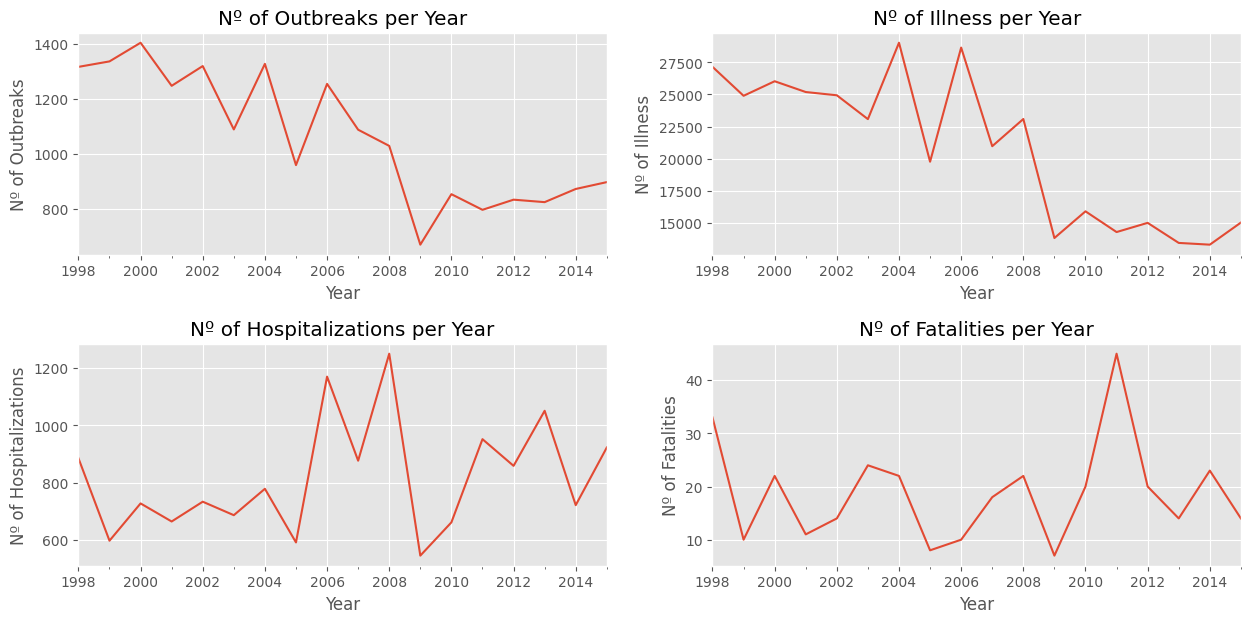

In [28]:
fig=plt.figure(figsize=(15,15))
plt.style.use("ggplot")

fig.add_subplot(4,2,1)
outbreaks_per_year["No_of_outbreaks"].plot()
plt.title("Nº of Outbreaks per Year")
plt.xlabel("Year")
plt.ylabel("Nº of Outbreaks")

fig.add_subplot(4,2,2)
outbreaks_per_year["No_of_Illnesses"].plot()
plt.title("Nº of Illness per Year")
plt.xlabel("Year")
plt.ylabel("Nº of Illness")

fig.add_subplot(4,2,3)
outbreaks_per_year["No_of_Hospitalizations"].plot()
plt.title("Nº of Hospitalizations per Year")
plt.xlabel("Year")
plt.ylabel("Nº of Hospitalizations")

fig.add_subplot(4,2,4)
outbreaks_per_year["No_of_Fatalities"].plot()
plt.title("Nº of Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Nº of Fatalities")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

__Analyzing the Data per Month__

In [29]:
# Create the Time Serie
st_outbreaks=outbreaks.set_index("Date")
st_outbreaks

State                               Location  \
Date                                                            
1998-01-01  California                             Restaurant   
1998-01-01  California                                    NaN   
1998-01-01  California                             Restaurant   
1998-01-01  California                             Restaurant   
1998-01-01  California                 Private Home/Residence   
...                ...                                    ...   
2015-12-01   Wisconsin                             Restaurant   
2015-12-01   Wisconsin                 Private Home/Residence   
2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
2015-12-01   Wisconsin                   Fast Food Restaurant   
2015-12-01     Wyoming                                    NaN   

                                         Food Ingredient  \
Date                                                       
1998-01-01                                NaN        NaN   
1998-01-01                            Custard        NaN   
1998-01-01                                NaN        NaN   
1998-01-01                          Fish, Ahi        NaN   
1998-01-01  Lasagna, Unspecified; Eggs, Other        NaN   
...                                       ...        ...   
2015-12-01                                NaN        NaN   
2015-12-01                              Salsa        NaN   
2015-12-01                                NaN        NaN   
2015-12-01                                NaN        NaN   
2015-12-01                                NaN        NaN   

                           Species       Serotype/Genotype     Status  \
Date                                                                    
1998-01-01                     NaN                     NaN        NaN   
1998-01-01                     NaN                     NaN        NaN   
1998-01-01                     NaN                     NaN        NaN   
1998-01-01         Scombroid toxin                     NaN  Confirmed   
1998-01-01     Salmonella enterica             Enteritidis  Confirmed   
...                            ...                     ...        ...   
2015-12-01  Norovirus genogroup II                  GII_14  Confirmed   
2015-12-01  Norovirus genogroup II                   GII_2  Confirmed   
2015-12-01  Norovirus genogroup II  GII_17 Kawasaki (2014)  Confirmed   
2015-12-01  Norovirus genogroup II                   GII_2  Confirmed   
2015-12-01                     NaN                     NaN        NaN   

            Illnesses  Hospitalizations  Fatalities  
Date                                                 
1998-01-01         20               0.0         0.0  
1998-01-01        112               0.0         0.0  
1998-01-01         35               0.0         0.0  
1998-01-01          4               0.0         0.0  
1998-01-01         26               3.0         0.0  
...               ...               ...         ...  
2015-12-01          4               0.0         0.0  
2015-12-01         16               0.0         0.0  
2015-12-01         43               3.0         0.0  
2015-12-01          5               0.0         0.0  
2015-12-01          3               0.0         0.0  

[19119 rows x 10 columns]

In [30]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [31]:
outb2=outbreaks

In [32]:
outb2['Month'] = outb2['Date'].dt.strftime('%m')

In [33]:
outb2

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities Month  
0             0.0    01  
1             0.0    01  
2             0.0    01  
3             0.0    01  
4             0.0    01  
...           ...   ...  
19114         0.0    12  
19115         0.0    12  
19116         0.0    12  
19117         0.0    12  
19118         0.0    12  

[19119 rows x 12 columns]

In [34]:
outbreaks_per_month2=outb2.groupby("Month").agg(Nº_of_outbreaks=("Month","count"))
outbreaks_per_month2

No_of_outbreaks
Month                 
01                1515
02                1448
03                1724
04                1725
05                1898
06                1819
07                1538
08                1533
09                1247
10                1347
11                1509
12                1816

In [35]:
outbreaks_per_month=st_outbreaks.groupby([lambda x: x.month]).sum()
outbreaks_per_month

<ipython-input-35-a4a51a433b81>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outbreaks_per_month=st_outbreaks.groupby([lambda x: x.month]).sum()


Illnesses  Hospitalizations  Fatalities
Date                                         
1         29145             784.0        24.0
2         29639             774.0        26.0
3         32178            1251.0        20.0
4         37557            1531.0        17.0
5         36704            1213.0        25.0
6         34632            1607.0        31.0
7         29713            1964.0        69.0
8         28210            1469.0        26.0
9         24022            1140.0        24.0
10        26632            1233.0        44.0
11        31314            1021.0        19.0
12        33785             694.0        12.0

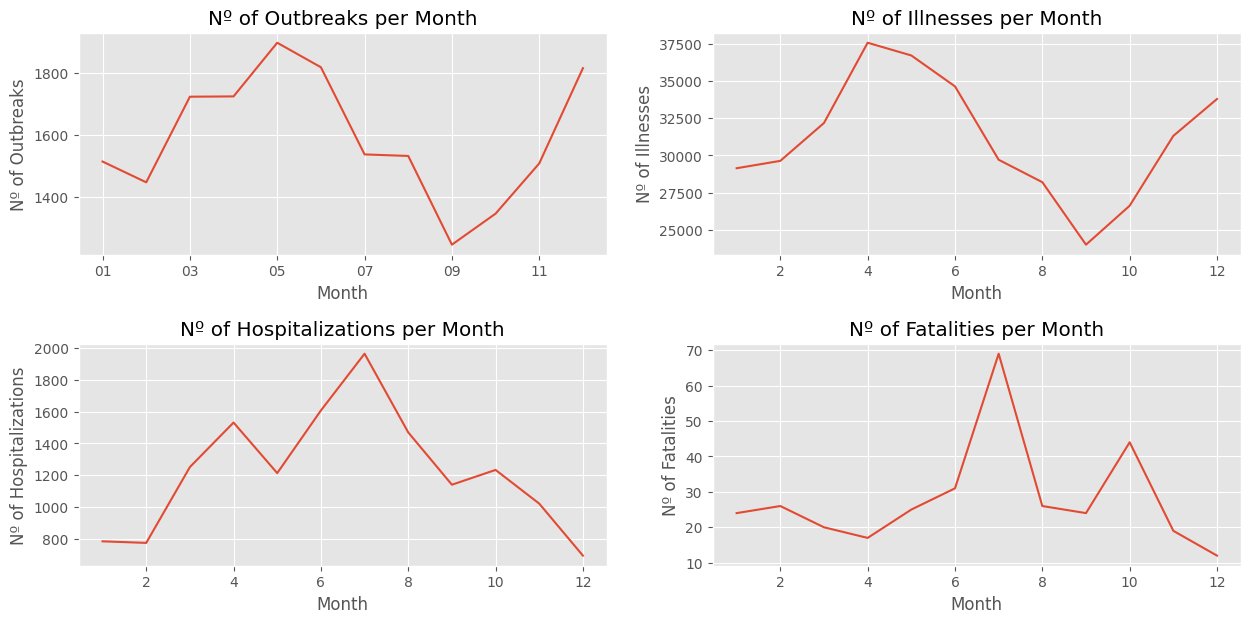

In [36]:
fig=plt.figure(figsize=(15,15))

fig.add_subplot(4,2,1)
outbreaks_per_month2["No_of_outbreaks"].plot()
plt.title("Nº of Outbreaks per Month")
plt.xlabel("Month")
plt.ylabel("Nº of Outbreaks")

fig.add_subplot(4,2,2)
outbreaks_per_month["Illnesses"].plot()
plt.title("Nº of Illnesses per Month")
plt.xlabel("Month")
plt.ylabel("Nº of Illnesses")

fig.add_subplot(4,2,3)
outbreaks_per_month["Hospitalizations"].plot()
plt.title("Nº of Hospitalizations per Month")
plt.xlabel("Month")
plt.ylabel("Nº of Hospitalizations")

fig.add_subplot(4,2,4)
outbreaks_per_month["Fatalities"].plot()
plt.title("Nº of Fatalities per Month")
plt.xlabel("Month")
plt.ylabel("Nº of Fatalities")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.show()

__Time Series Decomposition__

In [37]:
outbreaks_per_year

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
1998-12-31             1317            27156                   886.0   
1999-12-31             1337            24899                   598.0   
2000-12-31             1405            26033                   728.0   
2001-12-31             1248            25192                   665.0   
2002-12-31             1320            24939                   734.0   
2003-12-31             1089            23079                   687.0   
2004-12-31             1328            29034                   779.0   
2005-12-31              959            19761                   592.0   
2006-12-31             1255            28656                  1170.0   
2007-12-31             1088            20970                   877.0   
2008-12-31             1029            23089                  1250.0   
2009-12-31              669            13813                   546.0   
2010-12-31              853            15893                   662.0   
2011-12-31              796            14278                   952.0   
2012-12-31              833            14995                   859.0   
2013-12-31              824            13431                  1051.0   
2014-12-31              872            13295                   722.0   
2015-12-31              897            15018                   923.0   

            No_of_Fatalities  
Date                          
1998-12-31              33.0  
1999-12-31              10.0  
2000-12-31              22.0  
2001-12-31              11.0  
2002-12-31              14.0  
2003-12-31              24.0  
2004-12-31              22.0  
2005-12-31               8.0  
2006-12-31              10.0  
2007-12-31              18.0  
2008-12-31              22.0  
2009-12-31               7.0  
2010-12-31              20.0  
2011-12-31              45.0  
2012-12-31              20.0  
2013-12-31              14.0  
2014-12-31              23.0  
2015-12-31              14.0

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

_Nº of Outbreaks_

In [39]:
outbreaks_ts=outbreaks.groupby(pd.Grouper(key="Date",freq="M")).agg(Nº_of_outbreaks=("Date","count"),
                              Nº_of_Illnesses=("Illnesses","sum"),
                              Nº_of_Hospitalizations=("Hospitalizations","sum"),
                              Nº_of_Fatalities=("Fatalities","sum"))
outbreaks_ts

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
1998-01-31               90             1389                    35.0   
1998-02-28               87             1147                    19.0   
1998-03-31              119             1512                    99.0   
1998-04-30              109             2400                    78.0   
1998-05-31              135             2588                    73.0   
...                     ...              ...                     ...   
2015-08-31               76             1001                    37.0   
2015-09-30               51              884                    32.0   
2015-10-31               63             1440                   114.0   
2015-11-30               59              778                    18.0   
2015-12-31               99             1421                    31.0   

            No_of_Fatalities  
Date                          
1998-01-31               0.0  
1998-02-28               1.0  
1998-03-31               0.0  
1998-04-30               0.0  
1998-05-31               2.0  
...                      ...  
2015-08-31               0.0  
2015-09-30               0.0  
2015-10-31               0.0  
2015-11-30               0.0  
2015-12-31               1.0  

[216 rows x 4 columns]

In [40]:
decomp=seasonal_decompose(outbreaks_ts["No_of_outbreaks"])

In [41]:
trend=decomp.trend

In [42]:
seasonal=decomp.seasonal

In [43]:
aleatory=decomp.resid

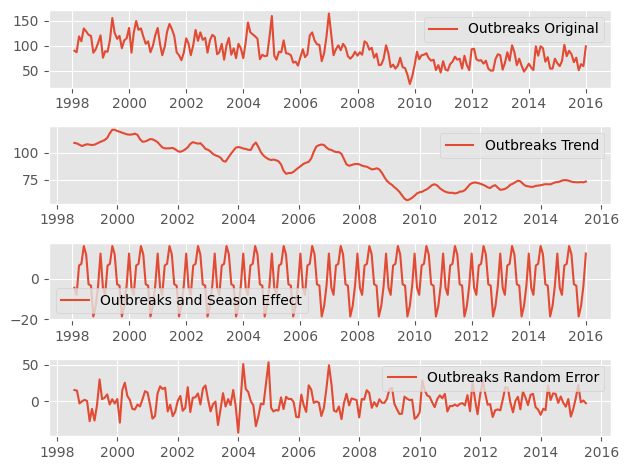

In [44]:
plt.subplot(4,1,1)
plt.plot(outbreaks_ts["No_of_outbreaks"],label="Outbreaks Original")
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(trend,label="Outbreaks Trend")
plt.legend(loc="best")

plt.subplot(4,1,3)
plt.plot(seasonal,label="Outbreaks and Season Effect")
plt.legend(loc="best")

plt.subplot(4,1,4)
plt.plot(aleatory,label="Outbreaks Random Error")
plt.legend(loc="best")
plt.tight_layout()

_Illnesses_

In [45]:
decomp_ill=seasonal_decompose(outbreaks_ts["No_of_Illnesses"])

In [46]:
trend_ill=decomp_ill.trend

In [47]:
seasonal_ill=decomp_ill.seasonal

In [48]:
random_ill=decomp_ill.resid

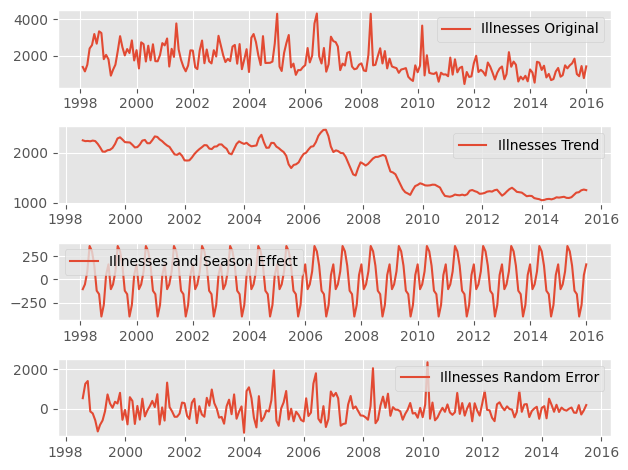

In [49]:
plt.subplot(4,1,1)
plt.plot(outbreaks_ts["No_of_Illnesses"],label="Illnesses Original")
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(trend_ill,label="Illnesses Trend")
plt.legend(loc="best")

plt.subplot(4,1,3)
plt.plot(seasonal_ill,label="Illnesses and Season Effect")
plt.legend(loc="best")

plt.subplot(4,1,4)
plt.plot(random_ill,label="Illnesses Random Error")
plt.legend(loc="best")
plt.tight_layout()

_Hospitalizations_

In [50]:
decomp_hosp=seasonal_decompose(outbreaks_ts["No_of_Hospitalizations"])
trend_hosp=decomp_hosp.trend
seasonal_hosp=decomp_hosp.seasonal
random_hosp=decomp_hosp.resid

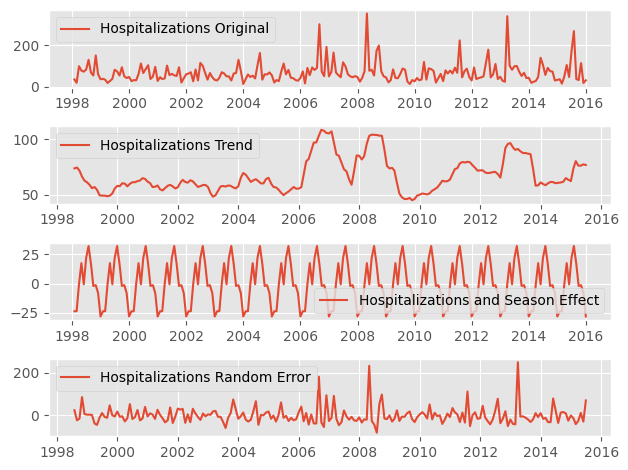

In [51]:
plt.subplot(4,1,1)
plt.plot(outbreaks_ts["No_of_Hospitalizations"],label="Hospitalizations Original")
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(trend_hosp,label="Hospitalizations Trend")
plt.legend(loc="best")

plt.subplot(4,1,3)
plt.plot(seasonal_hosp,label="Hospitalizations and Season Effect")
plt.legend(loc="best")

plt.subplot(4,1,4)
plt.plot(random_hosp,label="Hospitalizations Random Error")
plt.legend(loc="best")
plt.tight_layout()

_Fatalities_

In [52]:
decomp_fatal=seasonal_decompose(outbreaks_ts["No_of_Fatalities"])
trend_fatal=decomp_fatal.trend
seasonal_fatal=decomp_fatal.seasonal
random_fatal=decomp_fatal.resid

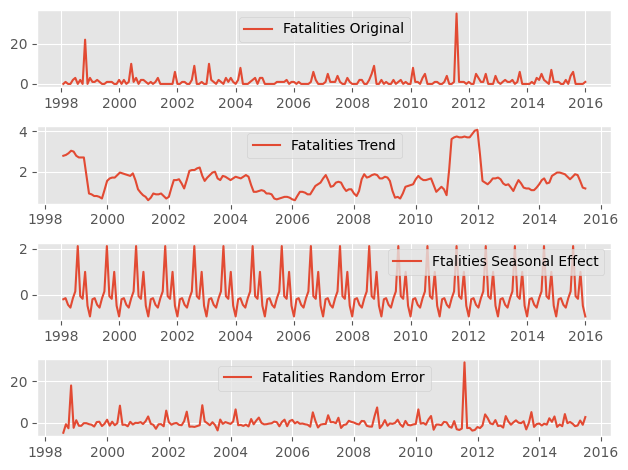

In [53]:
plt.subplot(4,1,1)
plt.plot(outbreaks_ts["No_of_Fatalities"],label="Fatalities Original")
plt.legend(loc="best")

plt.subplot(4,1,2)
plt.plot(trend_fatal,label="Fatalities Trend")
plt.legend(loc="best")

plt.subplot(4,1,3)
plt.plot(seasonal_fatal,label="Ftalities Seasonal Effect")
plt.legend(loc="best")

plt.subplot(4,1,4)
plt.plot(random_fatal,label="Fatalities Random Error")
plt.legend(loc="best")
plt.tight_layout()

__Time Serie Prevision (ARIMA Method)__

In [54]:
outbreaks_ts

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
1998-01-31               90             1389                    35.0   
1998-02-28               87             1147                    19.0   
1998-03-31              119             1512                    99.0   
1998-04-30              109             2400                    78.0   
1998-05-31              135             2588                    73.0   
...                     ...              ...                     ...   
2015-08-31               76             1001                    37.0   
2015-09-30               51              884                    32.0   
2015-10-31               63             1440                   114.0   
2015-11-30               59              778                    18.0   
2015-12-31               99             1421                    31.0   

            No_of_Fatalities  
Date                          
1998-01-31               0.0  
1998-02-28               1.0  
1998-03-31               0.0  
1998-04-30               0.0  
1998-05-31               2.0  
...                      ...  
2015-08-31               0.0  
2015-09-30               0.0  
2015-10-31               0.0  
2015-11-30               0.0  
2015-12-31               1.0  

[216 rows x 4 columns]

In [55]:
#Crete the training set and test set
training_set=outbreaks_ts.loc[outbreaks_ts.index<"2015-01-01"]
test_set=outbreaks_ts.loc[outbreaks_ts.index>="2015-01-01"]

In [56]:
training_set

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
1998-01-31               90             1389                    35.0   
1998-02-28               87             1147                    19.0   
1998-03-31              119             1512                    99.0   
1998-04-30              109             2400                    78.0   
1998-05-31              135             2588                    73.0   
...                     ...              ...                     ...   
2014-08-31               77             1010                    91.0   
2014-09-30               54              671                    75.0   
2014-10-31               54              726                    73.0   
2014-11-30               74             1140                    30.0   
2014-12-31               65             1334                    33.0   

            No_of_Fatalities  
Date                          
1998-01-31               0.0  
1998-02-28               1.0  
1998-03-31               0.0  
1998-04-30               0.0  
1998-05-31               2.0  
...                      ...  
2014-08-31               1.0  
2014-09-30               0.0  
2014-10-31               7.0  
2014-11-30               1.0  
2014-12-31               1.0  

[204 rows x 4 columns]

In [57]:
test_set

No_of_outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Date                                                                   
2015-01-31               59              856                    36.0   
2015-02-28               69              939                    15.0   
2015-03-31              102             1479                    50.0   
2015-04-30               79             1312                   105.0   
2015-05-31               90             1479                    47.0   
2015-06-30               83             1585                   169.0   
2015-07-31               67             1844                   269.0   
2015-08-31               76             1001                    37.0   
2015-09-30               51              884                    32.0   
2015-10-31               63             1440                   114.0   
2015-11-30               59              778                    18.0   
2015-12-31               99             1421                    31.0   

            No_of_Fatalities  
Date                          
2015-01-31               1.0  
2015-02-28               0.0  
2015-03-31               0.0  
2015-04-30               2.0  
2015-05-31               0.0  
2015-06-30               4.0  
2015-07-31               6.0  
2015-08-31               0.0  
2015-09-30               0.0  
2015-10-31               0.0  
2015-11-30               0.0  
2015-12-31               1.0

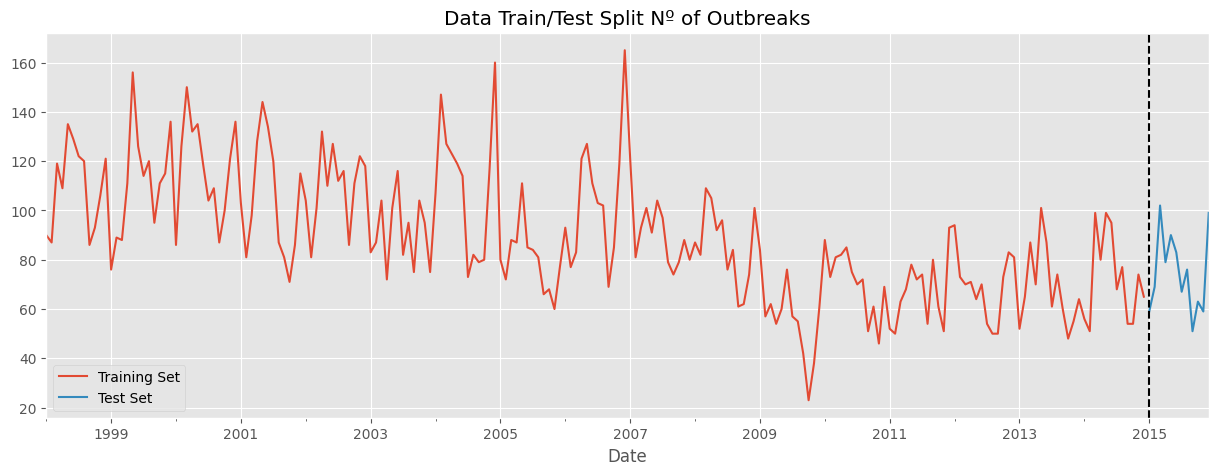

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
training_set["No_of_outbreaks"].plot(ax=ax, label='Training Set')
plt.title('Data Train/Test Split Nº of Outbreaks')
test_set["No_of_outbreaks"].plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [59]:
# crete the model
stepwise_model=auto_arima(outbreaks_ts["No_of_outbreaks"],start_q=1,start_d= 0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=2.07 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1912.638, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1902.183, Time=0.38 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1894.048, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1910.639, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1896.319, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1870.245, Time=2.06 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1843.161, Time=4.97 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=1835.041, Time=10.10 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1841.557, Time=3.02 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=6.31 sec
 ARIMA(1,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=6.95 sec
 ARIMA(0,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=

In [60]:
print(stepwise_model.aic())

1835.0407251872016


In [61]:
#Training the model with the training set
stepwise_model.fit(training_set["No_of_outbreaks"])

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [62]:
# See the model performence (Make the predictions with the test set

In [63]:
future_forecast = stepwise_model.predict(n_periods=13)
future_forecast

2015-01-31    52.668211
2015-02-28    47.072689
2015-03-31    58.509124
2015-04-30    59.078458
2015-05-31    73.356348
2015-06-30    69.018463
2015-07-31    56.495313
2015-08-31    52.758759
2015-09-30    43.811879
2015-10-31    43.063237
2015-11-30    47.371391
2015-12-31    61.530343
2016-01-31    57.969952
Freq: M, dtype: float64

In [64]:
future_forecast = pd.DataFrame(future_forecast,index = test_set.index,columns=["Nº_of_outbreaks"])

In [65]:
future_forecast

Nº_of_outbreaks
Date                       
2015-01-31        52.668211
2015-02-28        47.072689
2015-03-31        58.509124
2015-04-30        59.078458
2015-05-31        73.356348
2015-06-30        69.018463
2015-07-31        56.495313
2015-08-31        52.758759
2015-09-30        43.811879
2015-10-31        43.063237
2015-11-30        47.371391
2015-12-31        61.530343

<Axes: xlabel='Date'>

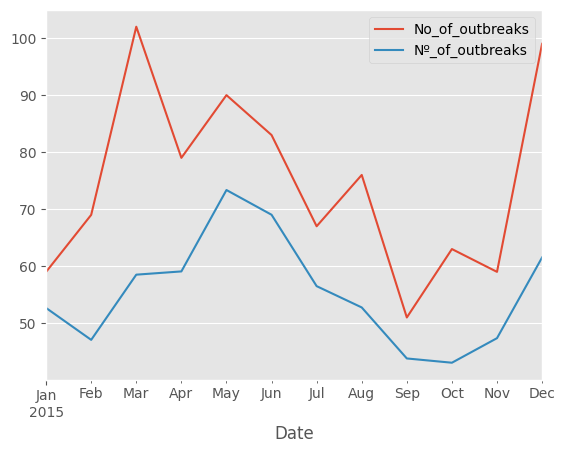

In [66]:
pd.concat([test_set["No_of_outbreaks"],future_forecast],axis=1).plot()

In [67]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test_set["No_of_outbreaks"],future_forecast["Nº_of_outbreaks"]))

22.212166816838224

In [68]:
# calculate error
np.abs(test_set["No_of_outbreaks"],future_forecast["Nº_of_outbreaks"])

Date
2015-01-31     59.0
2015-02-28     69.0
2015-03-31    102.0
2015-04-30     79.0
2015-05-31     90.0
2015-06-30     83.0
2015-07-31     67.0
2015-08-31     76.0
2015-09-30     51.0
2015-10-31     63.0
2015-11-30     59.0
2015-12-31     99.0
Freq: M, Name: No_of_outbreaks, dtype: float64

In [69]:
# Worst and Best Predictions
test_set["error"]=np.abs(test_set["No_of_outbreaks"],future_forecast["Nº_of_outbreaks"])
test_set["date"]=test_set.index.date

<ipython-input-69-343ef727cbc0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["error"]=np.abs(test_set["No_of_outbreaks"],future_forecast["Nº_of_outbreaks"])
<ipython-input-69-343ef727cbc0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set["date"]=test_set.index.date


In [70]:
#Worst Prediction
test_set.groupby("date")["error"].mean().sort_values(ascending=False).head(5)

date
2015-03-31    102.0
2015-12-31     99.0
2015-05-31     90.0
2015-06-30     83.0
2015-04-30     79.0
Name: error, dtype: float64

In [71]:
#Best Prediction
test_set.groupby("date")["error"].mean().sort_values(ascending=True).head(5)

date
2015-09-30    51.0
2015-01-31    59.0
2015-11-30    59.0
2015-10-31    63.0
2015-07-31    67.0
Name: error, dtype: float64

In [72]:
# Make a predictio for the next 5 years
stepwise_model.predict(n_periods=65)

2015-01-31    52.668211
2015-02-28    47.072689
2015-03-31    58.509124
2015-04-30    59.078458
2015-05-31    73.356348
                ...    
2020-01-31    48.649239
2020-02-29    45.455706
2020-03-31    59.402987
2020-04-30    60.874454
2020-05-31    64.666074
Freq: M, Length: 65, dtype: float64

In [73]:
next5years=pd.DataFrame(stepwise_model.predict(n_periods=65),columns=["Nº_of_outbreaks"])
next5years

Nº_of_outbreaks
2015-01-31        52.668211
2015-02-28        47.072689
2015-03-31        58.509124
2015-04-30        59.078458
2015-05-31        73.356348
...                     ...
2020-01-31        48.649239
2020-02-29        45.455706
2020-03-31        59.402987
2020-04-30        60.874454
2020-05-31        64.666074

[65 rows x 1 columns]

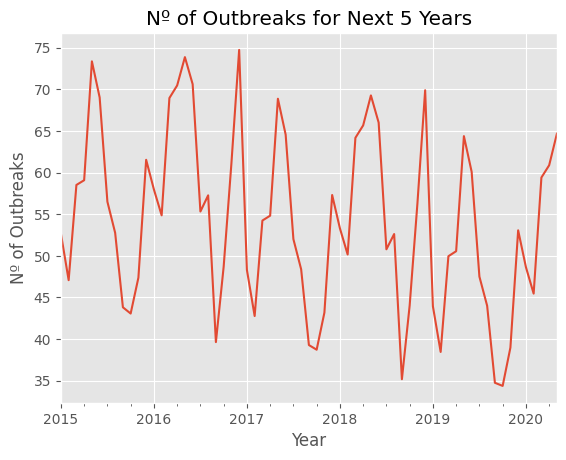

In [74]:
plt.style.use("ggplot")
next5years.plot()
plt.title("Nº of Outbreaks for Next 5 Years")
plt.xlabel("Year")
plt.ylabel("Nº of Outbreaks")
plt.legend([],[], frameon=False)
plt.show()

# Second Goal:
> What contamination has been responsible for the most ilnesses, hospitalizations and deaths?

In [75]:
outbreaks.drop(columns="Month",inplace=True)
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [76]:
outbreaks["Species"].value_counts()

Norovirus genogroup I                                                2744
Salmonella enterica                                                  2303
Norovirus genogroup II                                               1424
Norovirus unknown                                                     790
Clostridium perfringens                                               732
                                                                     ... 
Bacillus other                                                          1
Bacillus cereus; Clostridium perfringens; Bacterium                     1
Staphylococcus other                                                    1
Salmonella enterica; Clostridium perfringens; Salmonella enterica       1
Shigella sonnei; Campylobacter jejuni                                   1
Name: Species, Length: 201, dtype: int64

In [77]:
species=outbreaks.groupby("Species").agg(Nº_of_Outbreaks=("Species","count"),
                                        Nº_of_Illnesses=("Illnesses","sum"),
                                         Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                         Nº_of_Fatalities=("Fatalities","sum"))
species

No_of_Outbreaks  No_of_Illnesses  \
Species                                                      
Amnesic shellfish poison                1                2   
Anisakis                                1               14   
Astrovirus                              2               36   
Bacillus                                1                7   
Bacillus cereus                       299             2881   
...                                   ...              ...   
Vibrio unknown                          6               12   
Vibrio vulnificus                       1                2   
Virus                                 101             3034   
Yersinia                                1                2   
Yersinia enterocolitica                14              122   

                          No_of_Hospitalizations  No_of_Fatalities  
Species                                                             
Amnesic shellfish poison                     2.0               0.0  
Anisakis                                     0.0               0.0  
Astrovirus                                   0.0               0.0  
Bacillus                                     0.0               0.0  
Bacillus cereus                             23.0               0.0  
...                                          ...               ...  
Vibrio unknown                               2.0               0.0  
Vibrio vulnificus                            1.0               1.0  
Virus                                       24.0               0.0  
Yersinia                                     0.0               0.0  
Yersinia enterocolitica                     15.0               1.0  

[201 rows x 4 columns]

__Top 10 Species and Most Outbreaks__

In [78]:
species_top_10_outbreaks=species.sort_values(by="No_of_Outbreaks",ascending=False).head(10)
species_top_10_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
species_top_10_outbreaks

No_of_Outbreaks
Species                                                 
Norovirus genogroup I                               2744
Salmonella enterica                                 2303
Norovirus genogroup II                              1424
Norovirus unknown                                    790
Clostridium perfringens                              732
Staphylococcus aureus                                532
Escherichia coli, Shiga toxin-producing              485
Scombroid toxin                                      389
Norovirus                                            334
Bacillus cereus                                      299

<Figure size 800x500 with 0 Axes>

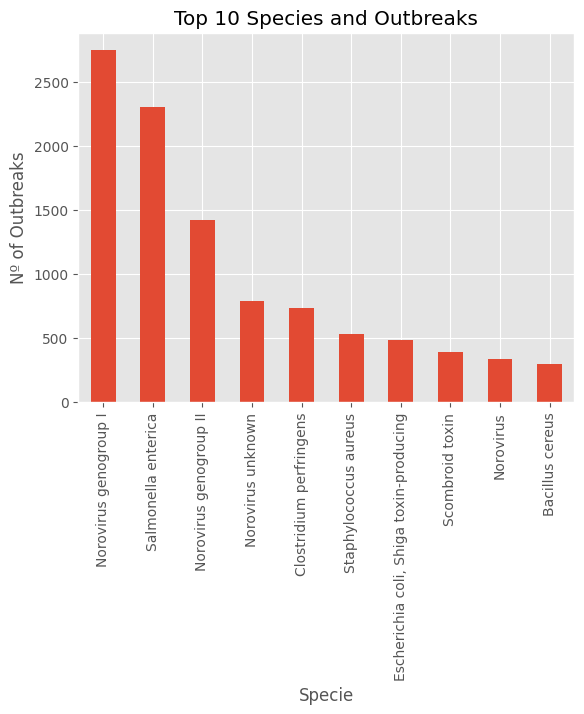

In [79]:
plt.figure(figsize=(8,5))
species_top_10_outbreaks.plot(kind="bar")
plt.title("Top 10 Species and Outbreaks")
plt.xlabel("Specie")
plt.ylabel("Nº of Outbreaks")
plt.legend([],[], frameon=False)
plt.show()

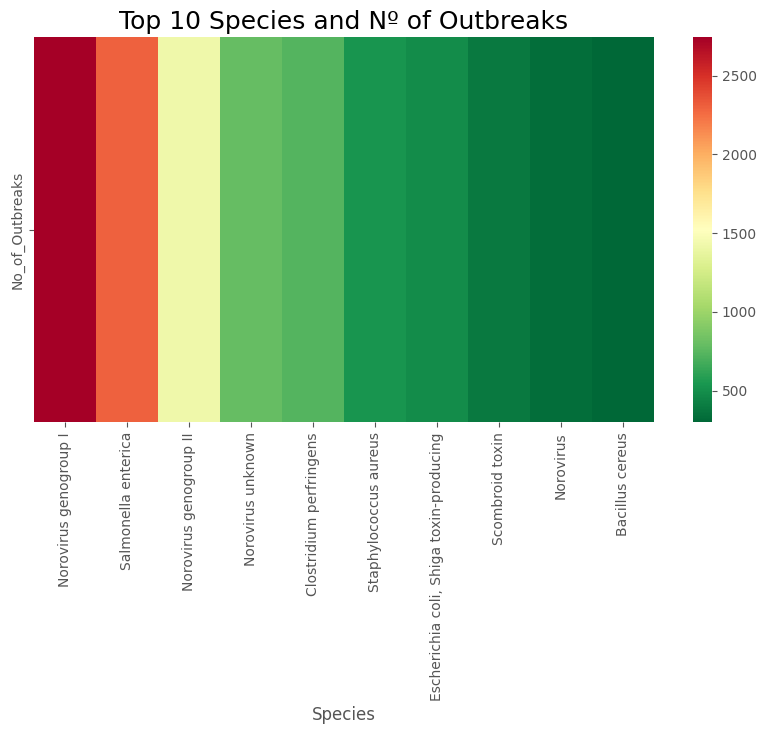

In [80]:
plt.figure(figsize = (10, 5))
sns.heatmap(species_top_10_outbreaks.T,cmap='RdYlGn_r',annot=False,fmt='2.0f')
plt.title("Top 10 Species and Nº of Outbreaks",fontsize=18)
plt.show()

__Top 10 Species and Most Illnesses__

In [81]:
species_top_10_ill=species.sort_values(by="No_of_Illnesses",ascending=False).head(10)
species_top_10_ill.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
species_top_10_ill

No_of_Illnesses
Species                                                 
Norovirus genogroup I                              76406
Salmonella enterica                                60018
Norovirus genogroup II                             38175
Clostridium perfringens                            28734
Norovirus unknown                                  17181
Escherichia coli, Shiga toxin-producing             8719
Staphylococcus aureus                               8409
Campylobacter jejuni                                6438
Shigella sonnei                                     6236
Norovirus                                           5539

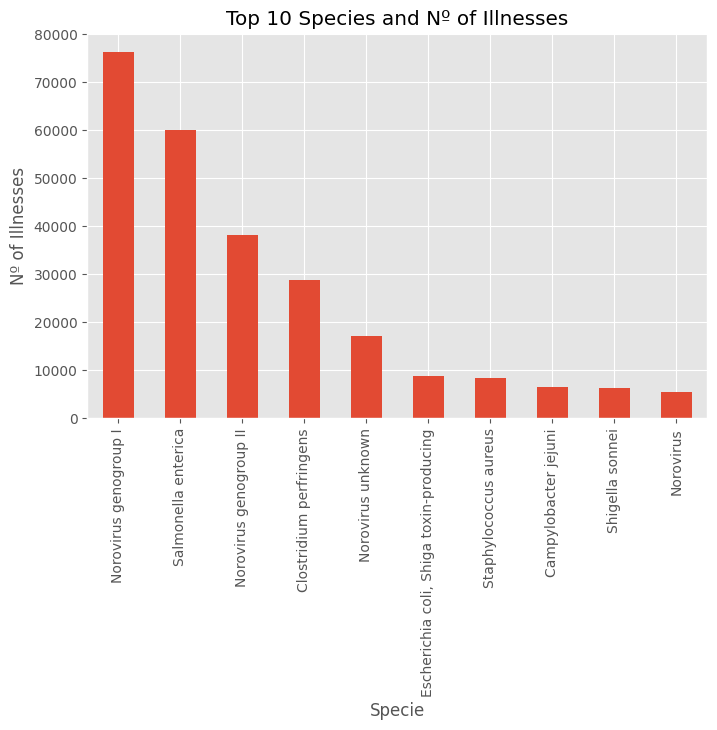

In [82]:
plt.figure(figsize=(8,5))
species_top_10_ill["No_of_Illnesses"].plot(kind="bar")
plt.title("Top 10 Species and Nº of Illnesses")
plt.xlabel("Specie")
plt.ylabel("Nº of Illnesses")
plt.show()

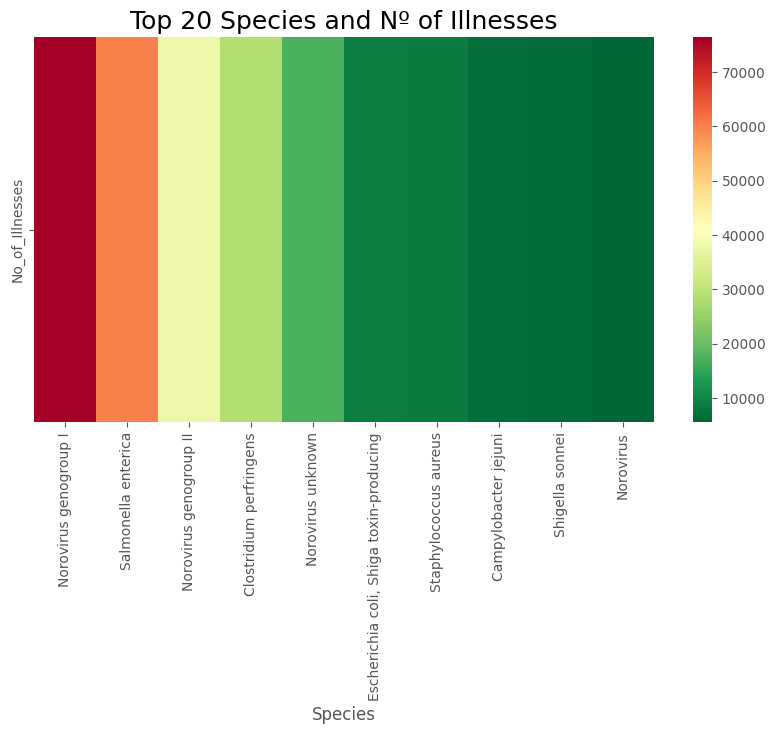

In [83]:
plt.figure(figsize = (10, 5))
sns.heatmap(species_top_10_ill.T,cmap='RdYlGn_r',annot=False,fmt='2.0f')
plt.title("Top 20 Species and Nº of Illnesses",fontsize=18)
plt.show()

__Top 10 Species and Most Hospitalizations__

In [84]:
species_top_10_hosp=species.sort_values(by="No_of_Hospitalizations",ascending=False).head(10)
species_top_10_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
species_top_10_hosp

No_of_Hospitalizations
Species                                                         
Salmonella enterica                                       6888.0
Escherichia coli, Shiga toxin-producing                   1919.0
Norovirus genogroup I                                      668.0
Listeria monocytogenes                                     576.0
Norovirus genogroup II                                     518.0
Staphylococcus aureus                                      419.0
Salmonella enterica; Salmonella enterica                   364.0
Hepatitis A                                                244.0
Shigella sonnei                                            224.0
Campylobacter jejuni                                       207.0

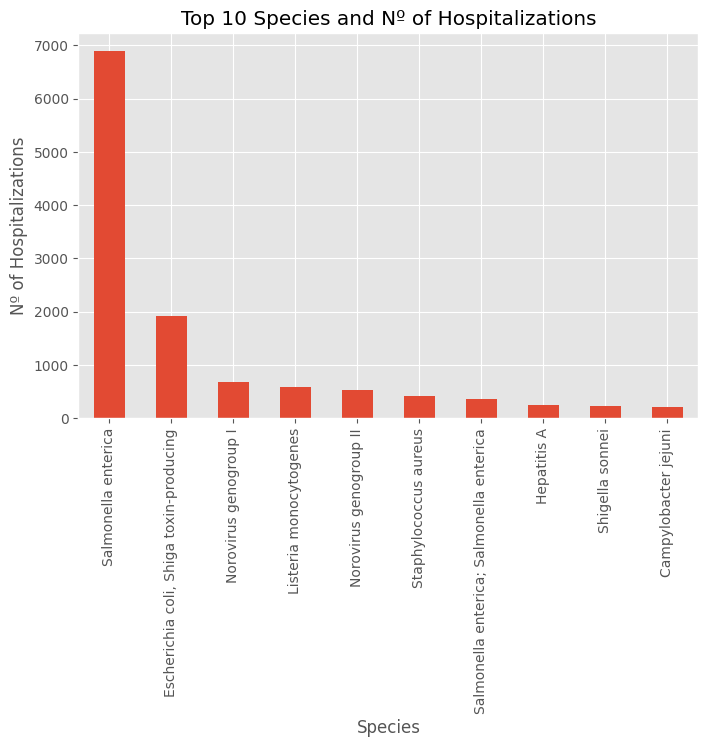

In [85]:
plt.figure(figsize=(8,5))
species_top_10_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Top 10 Species and Nº of Hospitalizations")
plt.xlabel("Species")
plt.ylabel("Nº of Hospitalizations")
plt.show()

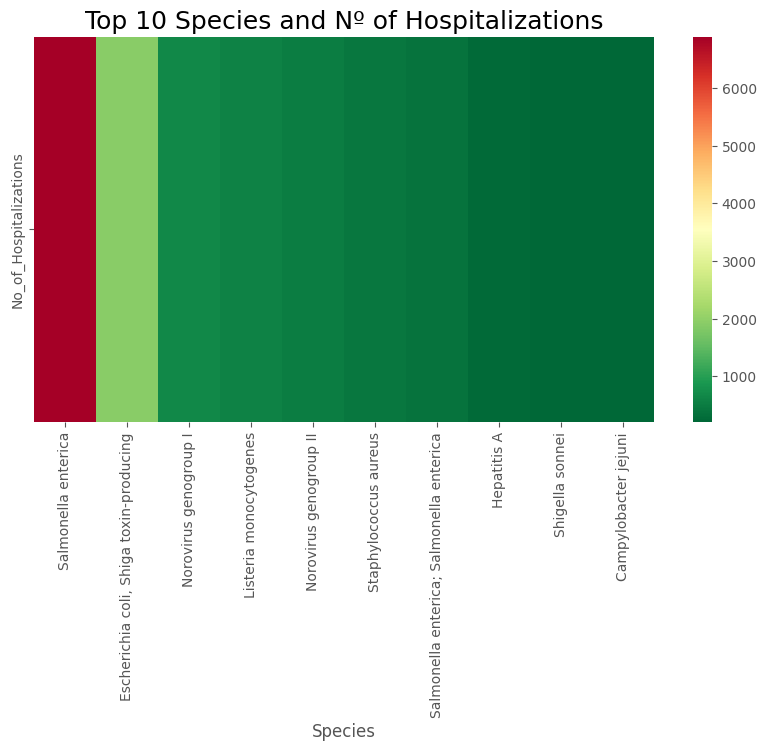

In [86]:
plt.figure(figsize = (10, 5))
sns.heatmap(species_top_10_hosp.T,cmap='RdYlGn_r',annot=False,fmt='2.0f')
plt.title("Top 10 Species and Nº of Hospitalizations",fontsize=18)
plt.show()

__Top 10 Species and Most Fatalities__

In [87]:
species_top_10_fatal=species.sort_values(by="No_of_Fatalities",ascending=False).head(10)
species_top_10_fatal.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Hospitalizations"],inplace=True)
species_top_10_fatal

No_of_Fatalities
Species                                                   
Listeria monocytogenes                               121.0
Salmonella enterica                                   82.0
Escherichia coli, Shiga toxin-producing               35.0
Clostridium perfringens                               12.0
Clostridium botulinum                                 10.0
Mycotoxins                                             7.0
Rotavirus                                              7.0
Norovirus genogroup II                                 6.0
Hepatitis A                                            5.0
Salmonella enterica; Salmonella enterica               4.0

<Figure size 800x500 with 0 Axes>

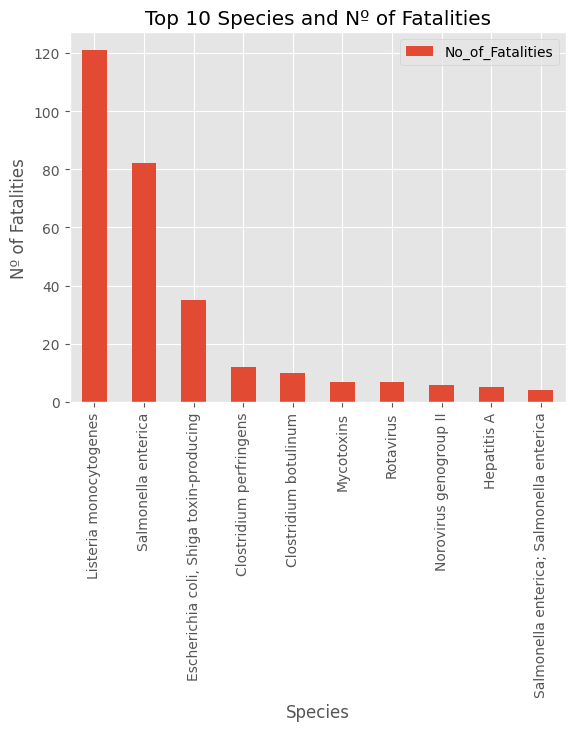

In [88]:
plt.figure(figsize=(8,5))
species_top_10_fatal.plot(kind="bar")
plt.title("Top 10 Species and Nº of Fatalities")
plt.xlabel("Species")
plt.ylabel("Nº of Fatalities")
plt.show()

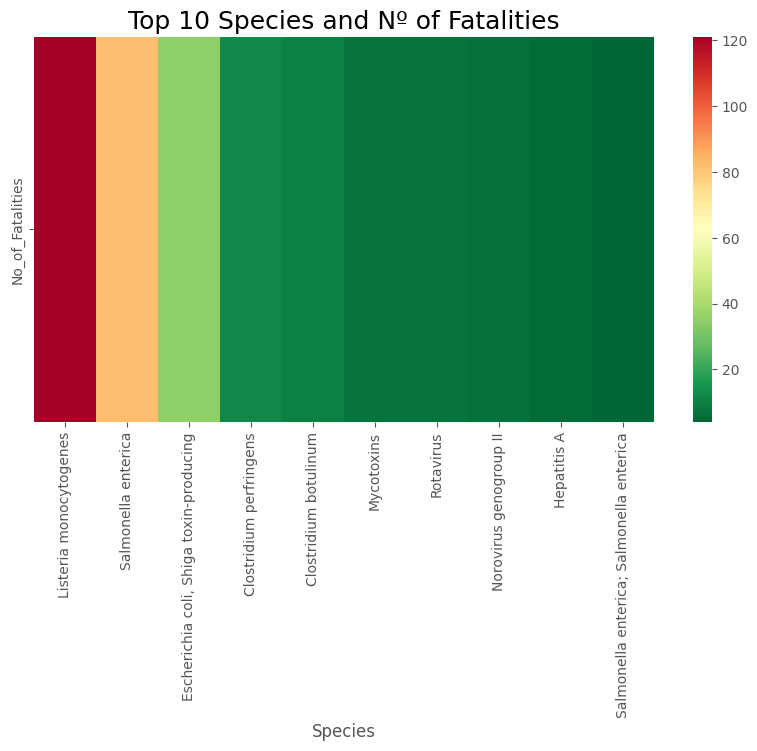

In [89]:
plt.figure(figsize = (10, 5))
sns.heatmap(species_top_10_fatal.T,cmap='RdYlGn_r',annot=False,fmt='2.0f')
plt.title("Top 10 Species and Nº of Fatalities",fontsize=18)
plt.show()

In [90]:
species

No_of_Outbreaks  No_of_Illnesses  \
Species                                                      
Amnesic shellfish poison                1                2   
Anisakis                                1               14   
Astrovirus                              2               36   
Bacillus                                1                7   
Bacillus cereus                       299             2881   
...                                   ...              ...   
Vibrio unknown                          6               12   
Vibrio vulnificus                       1                2   
Virus                                 101             3034   
Yersinia                                1                2   
Yersinia enterocolitica                14              122   

                          No_of_Hospitalizations  No_of_Fatalities  
Species                                                             
Amnesic shellfish poison                     2.0               0.0  
Anisakis                                     0.0               0.0  
Astrovirus                                   0.0               0.0  
Bacillus                                     0.0               0.0  
Bacillus cereus                             23.0               0.0  
...                                          ...               ...  
Vibrio unknown                               2.0               0.0  
Vibrio vulnificus                            1.0               1.0  
Virus                                       24.0               0.0  
Yersinia                                     0.0               0.0  
Yersinia enterocolitica                     15.0               1.0  

[201 rows x 4 columns]

# Third Goal:
> Which State for food preparation poses the greatest risk of foodborne illness?

__Nº of Outbreaks Per State__

In [91]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [92]:
states=outbreaks.groupby("State").agg(Nº_of_Outbreaks=("State","count"),
                                      Nº_of_Ilnesses=("Illnesses","sum"),
                                      Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                      Nº_of_Fatalities=("Fatalities","sum"))
states

No_of_Outbreaks  No_of_Ilnesses  No_of_Hospitalizations  \
State                                                                        
Alabama                        241            2638                   149.0   
Alaska                          86            1322                    90.0   
Arizona                        311            5059                   225.0   
Arkansas                        54            2383                   129.0   
California                    2293           39992                  1062.0   
Colorado                       510           10099                   201.0   
Connecticut                    238            4151                   131.0   
Delaware                        13             229                     8.0   
Florida                       2409           23050                   684.0   
Georgia                        375           10070                   320.0   
Guam                            25             196                     0.0   
Hawaii                         364            3558                   116.0   
Idaho                           80            1829                    59.0   
Illinois                      1133           24700                   713.0   
Indiana                        131            3286                   200.0   
Iowa                           162            4866                   109.0   
Kansas                         366            5791                   144.0   
Kentucky                        44             712                    48.0   
Louisiana                       76            4169                   131.0   
Maine                          185            4857                   102.0   
Maryland                       816            9474                   236.0   
Massachusetts                  229            6453                   240.0   
Michigan                       882           14471                   357.0   
Minnesota                      842           13533                   373.0   
Mississippi                     43            1402                    80.0   
Missouri                       124            4042                   108.0   
Montana                         41            1300                    40.0   
Multistate                     339           24573                  4011.0   
Nebraska                        36             919                    45.0   
Nevada                          64            2828                   119.0   
New Hampshire                   72            1933                    35.0   
New Jersey                     201            4322                   147.0   
New Mexico                      55            1466                    84.0   
New York                       909           17407                   591.0   
North Carolina                 193            6421                   225.0   
North Dakota                    76            2765                    28.0   
Ohio                          1288           20451                   659.0   
Oklahoma                        58            2163                   148.0   
Oregon                         504            8960                   195.0   
Pennsylvania                   480           11374                   384.0   
Puerto Rico                     80             926                    55.0   
Republic of Palau                2               9                     0.0   
Rhode Island                    62            1171                    51.0   
South Carolina                 146            4730                   192.0   
South Dakota                    26             681                    28.0   
Tennessee                      315            7475                   279.0   
Texas                          367           14187                   337.0   
Utah                            95            2350                    75.0   
Vermont                         41             511                    29.0   
Virginia                       254       

__States with most outbreaks__

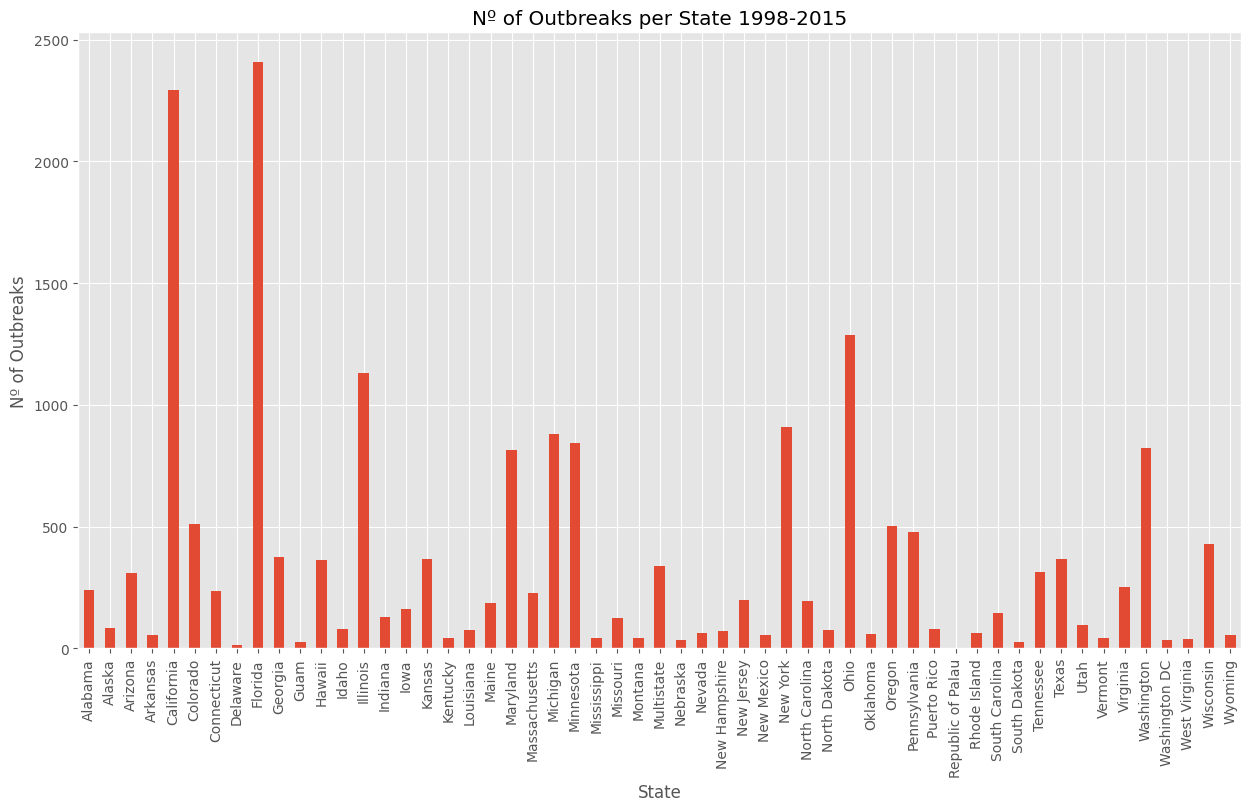

In [93]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
states["No_of_Outbreaks"].plot(kind="bar")
plt.title("Nº of Outbreaks per State 1998-2015")
plt.xlabel("State")
plt.ylabel("Nº of Outbreaks")
plt.show()

In [94]:
#!pip install chart_studio

In [95]:
# Choropleth Map
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [96]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [97]:
#Create "Code" Column
outbreaks["State"].value_counts()

Florida              2409
California           2293
Ohio                 1288
Illinois             1133
New York              909
Michigan              882
Minnesota             842
Washington            824
Maryland              816
Colorado              510
Oregon                504
Pennsylvania          480
Wisconsin             428
Georgia               375
Texas                 367
Kansas                366
Hawaii                364
Multistate            339
Tennessee             315
Arizona               311
Virginia              254
Alabama               241
Connecticut           238
Massachusetts         229
New Jersey            201
North Carolina        193
Maine                 185
Iowa                  162
South Carolina        146
Indiana               131
Missouri              124
Utah                   95
Alaska                 86
Idaho                  80
Puerto Rico            80
North Dakota           76
Louisiana              76
New Hampshire          72
Nevada      

In [98]:
# Clean "state" column
outbreaks["State"].replace("Washington DC","Washington",inplace=True)

In [99]:
multistate=outbreaks[outbreaks["State"]=="Multistate"]

In [100]:
outbreaks_map=outbreaks.drop(multistate.index)

In [101]:
outbreaks_map["State"].value_counts()

Florida              2409
California           2293
Ohio                 1288
Illinois             1133
New York              909
Michigan              882
Washington            859
Minnesota             842
Maryland              816
Colorado              510
Oregon                504
Pennsylvania          480
Wisconsin             428
Georgia               375
Texas                 367
Kansas                366
Hawaii                364
Tennessee             315
Arizona               311
Virginia              254
Alabama               241
Connecticut           238
Massachusetts         229
New Jersey            201
North Carolina        193
Maine                 185
Iowa                  162
South Carolina        146
Indiana               131
Missouri              124
Utah                   95
Alaska                 86
Idaho                  80
Puerto Rico            80
Louisiana              76
North Dakota           76
New Hampshire          72
Nevada                 64
Rhode Island

In [102]:
def code(state):
    if state=="Florida":
        return "FL"
    elif state=="California":
        return "CA"
    elif state=="Ohio":
        return "OH"
    elif state=="Illinois":
        return "IL"
    elif state=="New York":
        return "NY"
    elif state=="Michigan":
        return "MI"
    elif state=="Minnesota":
        return "MN"
    elif state=="Washington":
        return "WA"
    elif state=="Maryland":
        return "MD"
    elif state=="Colorado":
        return "CO"
    elif state=="Oregon":
        return "OR"
    elif state=="Pennsylvania":
        return "PA"
    elif state=="Wisconsin":
        return "WI"
    elif state=="Georgia":
        return "GA"
    elif state=="Texas":
        return "TX"
    elif state=="Kansas":
        return "KS"
    elif state=="Hawaii":
        return "HI"
    elif state=="Tennessee":
        return "TN"
    elif state=="Arizona":
        return "AZ"
    elif state=="Virginia":
        return "VA"
    elif state=="Alabama":
        return "AL"
    elif state=="Connecticut":
        return "CT"
    elif state=="Massachusetts":
        return "MA"
    elif state=="New Jersey":
        return "NJ"
    elif state=="North Carolina":
        return "NC"
    elif state=="Maine":
        return "ME"
    elif state=="Iowa":
        return "IA"
    elif state=="South Carolina":
        return "SC"
    elif state=="Indiana":
        return "IN"
    elif state=="Missouri":
        return "MO"
    elif state=="Utah":
        return "UT"
    elif state=="Alaska":
        return "AK"
    elif state=="Idaho":
        return "ID"
    elif state=="Puerto Rico":
        return "PR"
    elif state=="North Dakota":
        return "ND"
    elif state=="Louisiana":
        return "LA"
    elif state=="New Hampshire":
        return "NH"
    elif state=="Nevada":
        return "NV"
    elif state=="Rhode Island":
        return "RI"
    elif state=="Oklahoma":
        return "OK"
    elif state=="Wyoming":
        return "WY"
    elif state=="New Mexico":
        return "NM"
    elif state=="Arkansas":
        return "AR"
    elif state=="Kentucky":
        return "KY"
    elif state=="Mississippi":
        return "MS"
    elif state=="Vermont":
        return "VT"
    elif state=="Montana":
        return "MT"
    elif state=="West Virginia":
        return "WV"
    elif state=="Nebraska":
        return "NE"
    elif state=="South Dakota":
        return "SD"
    elif state=="Guam":
        return "GU"
    elif state=="Delaware":
        return "DE"

In [103]:
outbreaks_map["State Code"]=outbreaks_map["State"].apply(code)

In [104]:
outbreaks_map

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities State Code  
0             0.0         CA  
1             0.0         CA  
2             0.0         CA  
3             0.0         CA  
4             0.0         CA  
...           ...        ...  
19114         0.0         WI  
19115         0.0         WI  
19116         0.0         WI  
19117         0.0         WI  
19118         0.0         WY  

[18780 rows x 12 columns]

In [105]:
# Create the Data Frame
state_map=outbreaks_map.groupby("State Code").agg(Nº_of_Outbreaks=("Date","count"),
                                                Nº_of_Illnesses=("Illnesses","sum"),
                                                Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                                Nº_of_Fatalities=("Fatalities","sum"))
state_map

No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
State Code                                                             
AK                       86             1322                    90.0   
AL                      241             2638                   149.0   
AR                       54             2383                   129.0   
AZ                      311             5059                   225.0   
CA                     2293            39992                  1062.0   
CO                      510            10099                   201.0   
CT                      238             4151                   131.0   
DE                       13              229                     8.0   
FL                     2409            23050                   684.0   
GA                      375            10070                   320.0   
GU                       25              196                     0.0   
HI                      364             3558                   116.0   
IA                      162             4866                   109.0   
ID                       80             1829                    59.0   
IL                     1133            24700                   713.0   
IN                      131             3286                   200.0   
KS                      366             5791                   144.0   
KY                       44              712                    48.0   
LA                       76             4169                   131.0   
MA                      229             6453                   240.0   
MD                      816             9474                   236.0   
ME                      185             4857                   102.0   
MI                      882            14471                   357.0   
MN                      842            13533                   373.0   
MO                      124             4042                   108.0   
MS                       43             1402                    80.0   
MT                       41             1300                    40.0   
NC                      193             6421                   225.0   
ND                       76             2765                    28.0   
NE                       36              919                    45.0   
NH                       72             1933                    35.0   
NJ                      201             4322                   147.0   
NM                       55             1466                    84.0   
NV                       64             2828                   119.0   
NY                      909            17407                   591.0   
OH                     1288            20451                   659.0   
OK                       58             2163                   148.0   
OR                      504             8960                   195.0   
PA                      480            11374                   384.0   
PR                       80              926                    55.0   
RI                       62             1171                    51.0   
SC                      146             4730                   192.0   
SD                       26              681                    28.0   
TN                      315             7475                   279.0   
TX                      367            14187                   337.0   
UT                       95             2350                    75.0   
VA                      254             7167                   221.0   
VT                       41              511                    29.0   
WA                      859            11285                   265.0   
WI                      428            11014                   334.0   
WV                       39             1091                    48.0   
WY                       57             1720                    41.0   

            No_of_Fatalities  
State Code                    
AK                       1.0  
AL                       1.0  

In [106]:
state_map.reset_index(inplace=True)
state_map

State Code  No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
0          AK               86             1322                    90.0   
1          AL              241             2638                   149.0   
2          AR               54             2383                   129.0   
3          AZ              311             5059                   225.0   
4          CA             2293            39992                  1062.0   
5          CO              510            10099                   201.0   
6          CT              238             4151                   131.0   
7          DE               13              229                     8.0   
8          FL             2409            23050                   684.0   
9          GA              375            10070                   320.0   
10         GU               25              196                     0.0   
11         HI              364             3558                   116.0   
12         IA              162             4866                   109.0   
13         ID               80             1829                    59.0   
14         IL             1133            24700                   713.0   
15         IN              131             3286                   200.0   
16         KS              366             5791                   144.0   
17         KY               44              712                    48.0   
18         LA               76             4169                   131.0   
19         MA              229             6453                   240.0   
20         MD              816             9474                   236.0   
21         ME              185             4857                   102.0   
22         MI              882            14471                   357.0   
23         MN              842            13533                   373.0   
24         MO              124             4042                   108.0   
25         MS               43             1402                    80.0   
26         MT               41             1300                    40.0   
27         NC              193             6421                   225.0   
28         ND               76             2765                    28.0   
29         NE               36              919                    45.0   
30         NH               72             1933                    35.0   
31         NJ              201             4322                   147.0   
32         NM               55             1466                    84.0   
33         NV               64             2828                   119.0   
34         NY              909            17407                   591.0   
35         OH             1288            20451                   659.0   
36         OK               58             2163                   148.0   
37         OR              504             8960                   195.0   
38         PA              480            11374                   384.0   
39         PR               80              926                    55.0   
40         RI               62             1171                    51.0   
41         SC              146             4730                   192.0   
42         SD               26              681                    28.0   
43         TN              315             7475                   279.0   
44         TX              367            14187                   337.0   
45         UT               95             2350                    75.0   
46         VA              254             7167                   221.0   
47         VT               41              511                    29.0   
48         WA              859            11285                   265.0   
49         WI              428            11014                   334.0   
50         WV               39             1091                    48.0   
51         WY               57             1720                    41.0   

    No_of_Fatalities  
0   

In [107]:
# Create a "Text" column
state_map["text"]= state_map["State Code"].astype(str)+ "<br>" +   "Nº of Outbreaks"+ state_map["No_of_Outbreaks"].astype(str) +  "<br>" + "Nº of Illnesses"+ state_map["No_of_Illnesses"].astype(str) + "<br>" + "Nº of Hospitalizaions"+ state_map["No_of_Hospitalizations"].astype(str) + "<br>" + "Nº of Fatalities"+ state_map["No_of_Fatalities"].astype(str)

In [108]:
state_map

State Code  No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
0          AK               86             1322                    90.0   
1          AL              241             2638                   149.0   
2          AR               54             2383                   129.0   
3          AZ              311             5059                   225.0   
4          CA             2293            39992                  1062.0   
5          CO              510            10099                   201.0   
6          CT              238             4151                   131.0   
7          DE               13              229                     8.0   
8          FL             2409            23050                   684.0   
9          GA              375            10070                   320.0   
10         GU               25              196                     0.0   
11         HI              364             3558                   116.0   
12         IA              162             4866                   109.0   
13         ID               80             1829                    59.0   
14         IL             1133            24700                   713.0   
15         IN              131             3286                   200.0   
16         KS              366             5791                   144.0   
17         KY               44              712                    48.0   
18         LA               76             4169                   131.0   
19         MA              229             6453                   240.0   
20         MD              816             9474                   236.0   
21         ME              185             4857                   102.0   
22         MI              882            14471                   357.0   
23         MN              842            13533                   373.0   
24         MO              124             4042                   108.0   
25         MS               43             1402                    80.0   
26         MT               41             1300                    40.0   
27         NC              193             6421                   225.0   
28         ND               76             2765                    28.0   
29         NE               36              919                    45.0   
30         NH               72             1933                    35.0   
31         NJ              201             4322                   147.0   
32         NM               55             1466                    84.0   
33         NV               64             2828                   119.0   
34         NY              909            17407                   591.0   
35         OH             1288            20451                   659.0   
36         OK               58             2163                   148.0   
37         OR              504             8960                   195.0   
38         PA              480            11374                   384.0   
39         PR               80              926                    55.0   
40         RI               62             1171                    51.0   
41         SC              146             4730                   192.0   
42         SD               26              681                    28.0   
43         TN              315             7475                   279.0   
44         TX              367            14187                   337.0   
45         UT               95             2350                    75.0   
46         VA              254             7167                   221.0   
47         VT               41              511                    29.0   
48         WA              859            11285                   265.0   
49         WI              428            11014                   334.0   
50         WV               39             1091                    48.0   
51         WY               57             1720                    41.0   

    No_of_Fatalities       

In [109]:
data=dict(type="choropleth",
          colorscale="temps",
          locations=state_map["State Code"],
          locationmode="USA-states",
          z=state_map["No_of_Outbreaks"],
          text=state_map["text"],
          marker=dict(line=dict(color="rgb(255,255,255)",width=4)),
          colorbar={"title":"Nº of Outbreaks"})

In [110]:
layout=dict(title="Foodborne Disseases by State",
            geo=dict(scope="usa",
            showlakes=True,
            lakecolor="rgb(85,173,240)"))

In [111]:
choromap2=go.Figure(data=[data],layout=layout)

In [112]:
iplot(choromap2)

# Fourth Goal

> Which Food caused the higher number of outbreaks, hospitalizaions, illnesses and fatalities

>Which Ingredient caused the higher number of outbreaks, hospitalizaions, illnesses and fatalities

>Which location is associated to the higher number of outbreaks, hospitalizaions, illnesses and fatalities

In [113]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

__Which Food caused the higher number of outbreaks, hospitalizaions, illnesses and fatalities__

In [114]:
outbreaks["Food"].value_counts()

Multiple Foods                                        206
Oysters, Raw                                          165
Ground Beef, Hamburger                                127
Salad, Unspecified                                    118
Chicken, Unspecified                                  105
                                                     ... 
Goat, Other                                             1
Chicken, Nuggets/Fingers; Coleslaw; Potato, Mashed      1
Sandwich, Club; Potato Salad                            1
Milk, 2% Milk Pasteurized                               1
Cookies, Chocolate Chip                                 1
Name: Food, Length: 3127, dtype: int64

In [115]:
food=outbreaks.groupby("Food").agg(Nº_of_Outbreaks=("Date","count"),
                                   Nº_of_Illnesses=("Illnesses","sum"),
                                   Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                   Nº_of_Fatalities=("Fatalities","sum"))
food

No_of_Outbreaks  \
Food                                                                  
Acai, Bananas, Strawberries, Sugar Cane Juice                     1   
Ackawi Cheese, Pasteurized; Chives Cheese, Past...                1   
Alcohol                                                           6   
Alcohol; Water                                                    1   
Alfalfa Sprouts                                                  24   
...                                                             ...   
Yogurt, Unspecified                                               1   
Ziti & Meatballs; Water; Paella                                   1   
Zucchini                                                          2   
Zucchini, Marinated; Zucchini, Fried; Bruschett...                1   
Zucchini, Unspecified; Cake, Custard-Filled; Ve...                1   

                                                    No_of_Illnesses  \
Food                                                                  
Acai, Bananas, Strawberries, Sugar Cane Juice                     3   
Ackawi Cheese, Pasteurized; Chives Cheese, Past...                2   
Alcohol                                                          83   
Alcohol; Water                                                    8   
Alfalfa Sprouts                                                 993   
...                                                             ...   
Yogurt, Unspecified                                              12   
Ziti & Meatballs; Water; Paella                                  21   
Zucchini                                                         15   
Zucchini, Marinated; Zucchini, Fried; Bruschett...               18   
Zucchini, Unspecified; Cake, Custard-Filled; Ve...               10   

                                                    No_of_Hospitalizations  \
Food                                                                         
Acai, Bananas, Strawberries, Sugar Cane Juice                          2.0   
Ackawi Cheese, Pasteurized; Chives Cheese, Past...                     2.0   
Alcohol                                                               12.0   
Alcohol; Water                                                         0.0   
Alfalfa Sprouts                                                       89.0   
...                                                                    ...   
Yogurt, Unspecified                                                    0.0   
Ziti & Meatballs; Water; Paella                                        0.0   
Zucchini                                                               0.0   
Zucchini, Marinated; Zucchini, Fried; Bruschett...                     2.0   
Zucchini, Unspecified; Cake, Custard-Filled; Ve...                     0.0   

                                                    No_of_Fatalities  
Food                                                                  
Acai, Bananas, Strawberries, Sugar Cane Juice                    0.0  
Ackawi Cheese, Pasteurized; Chives Cheese, Past...               1.0  
Alcohol                                                          0.0  
Alcohol; Water                                                   0.0  
Alfalfa Sprouts                                                  1.0  
...                                                              ...  
Yogurt, Unspecified                                              0.0  
Ziti & Meatballs; Water; Paella                                  0.0  
Zucchini                                                         0.0  
Zucchini, Marinated; Zucchini, Fried; Bruschett...               0.0  
Zucchini, Unspecified; Cake, Custard-Filled; Ve...               0.0  

[3127 rows x 4 columns]

In [116]:
food_outbreaks=food.sort_values(by="No_of_Outbreaks",ascending=False)

In [117]:
top10_food_outbreaks=food_outbreaks.nlargest(10,"No_of_Outbreaks")
top10_food_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
top10_food_outbreaks

No_of_Outbreaks
Food                                             
Multiple Foods                                206
Oysters, Raw                                  165
Ground Beef, Hamburger                        127
Salad, Unspecified                            118
Chicken, Unspecified                          105
Sandwich, Submarine                            85
Chicken, Other                                 83
Pizza, Unspecified                             81
Lettuce-Based Salads Unspecified               81
Pork, Bbq                                      80

In [118]:
food_outbreaks=food.sort_values(by="No_of_Illnesses",ascending=False)
top10_food_illnesses=food_outbreaks.nlargest(10,"No_of_Illnesses")
top10_food_illnesses.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
top10_food_illnesses

No_of_Illnesses
Food                                    
Multiple Foods                      5451
Salad, Unspecified                  2650
Pork, Bbq                           2401
Tomato, Unspecified                 2356
Potato Salad                        2177
Shell Egg, Other                    1994
Chicken, Other                      1825
Chicken Salad                       1770
Other Milk, Pasteurized             1744
Salsa, Unspecified                  1712

In [119]:
food_outbreaks=food.sort_values(by="No_of_Hospitalizations",ascending=False)
top10_food_hosp=food_outbreaks.nlargest(10,"No_of_Hospitalizations")
top10_food_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
top10_food_hosp

No_of_Hospitalizations
Food                                                                      
Cantaloupe                                                           317.0
Peppers, Jalapeno; Tomato, Unspecified; Peppers...                   308.0
Cucumber                                                             289.0
Chicken                                                              285.0
Ground Beef, Unspecified                                             206.0
Peanut Butter; Peanut Paste                                          166.0
Roma Tomato                                                          162.0
Pork, Bbq                                                            162.0
Tomato, Unspecified                                                  161.0
Peanut Butter                                                        139.0

In [120]:
food_outbreaks=food.sort_values(by="No_of_Fatalities",ascending=False)
top10_food_fatal=food_outbreaks.nlargest(10,"No_of_Fatalities")
top10_food_fatal.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Hospitalizations"],inplace=True)
top10_food_fatal

No_of_Fatalities
Food                                         
Cantaloupe                               39.0
Hot Dog, Unspecified                     21.0
Deli Meat, Sliced Turkey                 16.0
Peanut Butter; Peanut Paste               9.0
Caramel Apple                             7.0
Cucumber                                  7.0
Fried Rice, Unspecified                   7.0
Ricotta Salata Cheese                     5.0
Spinach                                   5.0
Celery, Unspecified                       5.0

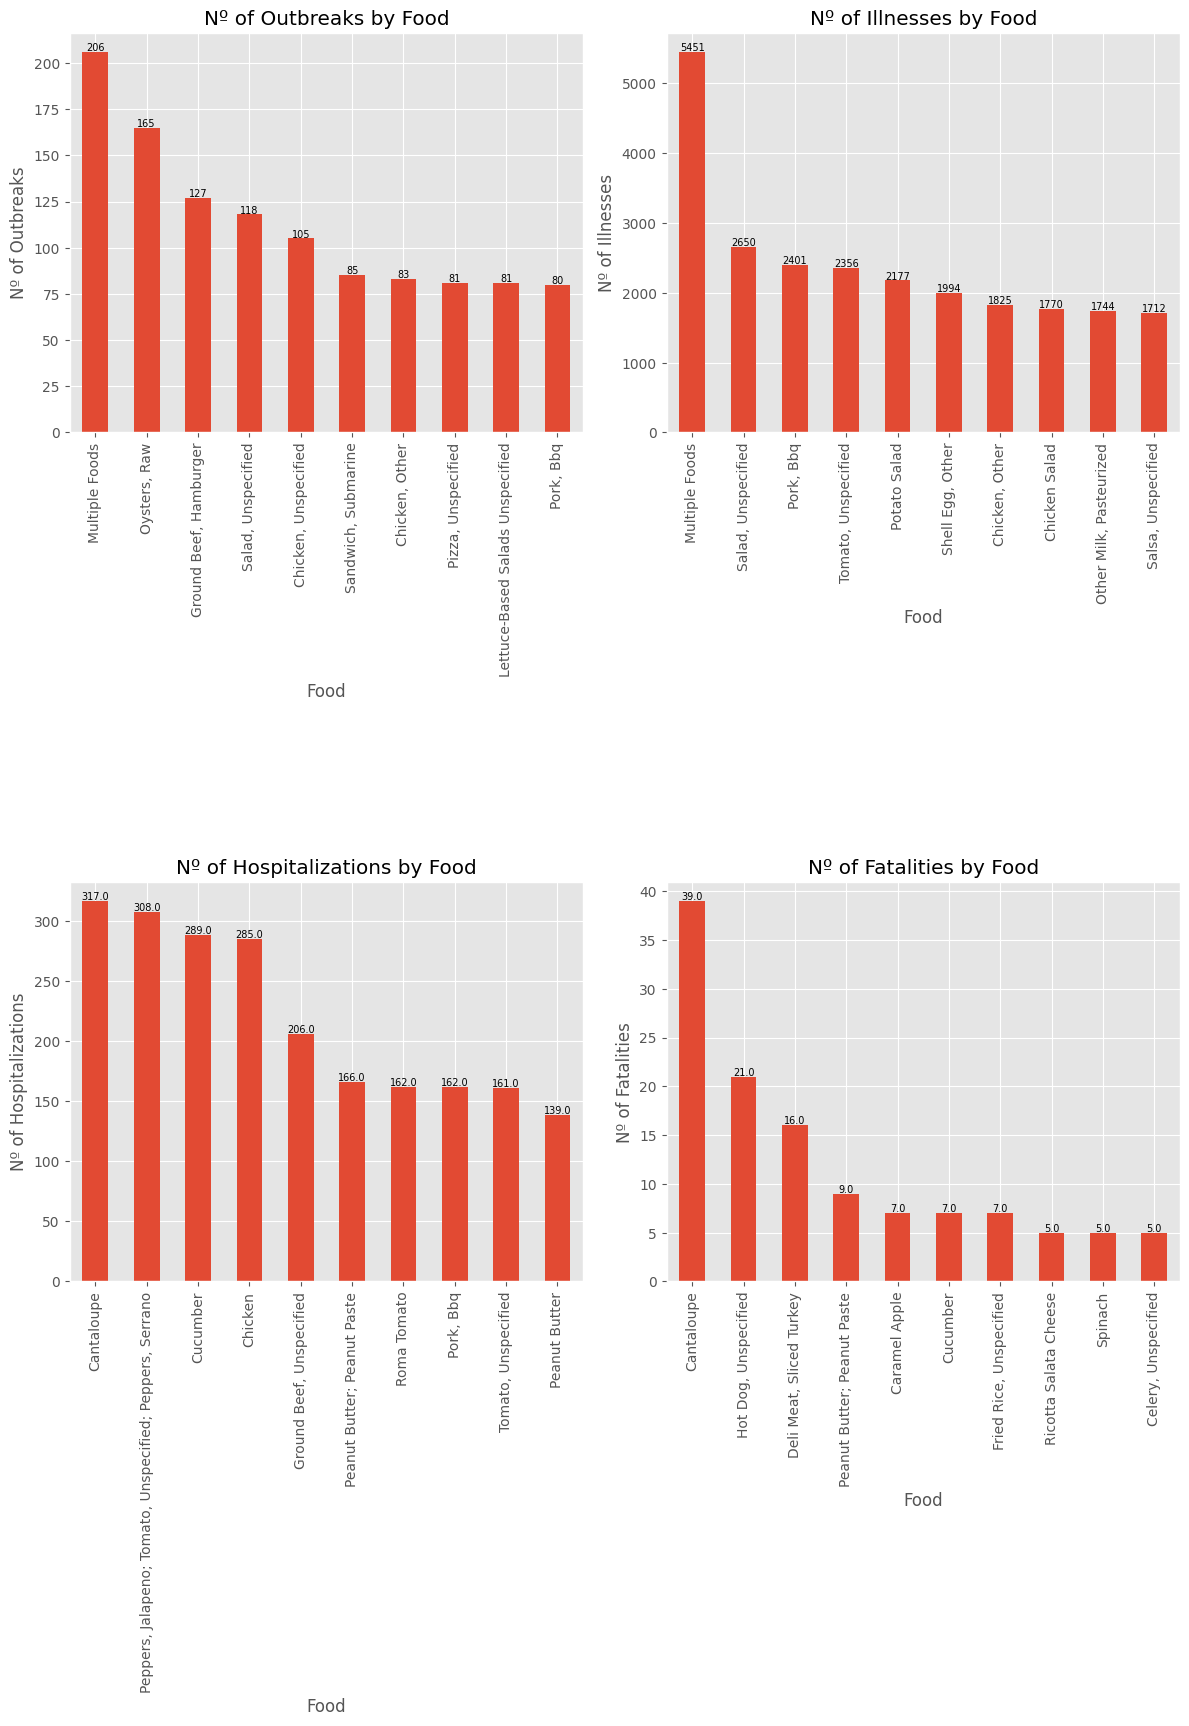

In [121]:
fig=plt.figure(figsize=(12,30))

fig.add_subplot(4,2,1)
plot=top10_food_outbreaks["No_of_Outbreaks"].plot(kind="bar")
plt.title("Nº of Outbreaks by Food")
plt.xlabel("Food")
plt.ylabel("Nº of Outbreaks")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center", va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,2)
plot=top10_food_illnesses["No_of_Illnesses"].plot(kind="bar")
plt.title("Nº of Illnesses by Food")
plt.xlabel("Food")
plt.ylabel("Nº of Illnesses")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,3)
plot=top10_food_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Nº of Hospitalizations by Food")
plt.ylabel("Nº of Hospitalizations")
plt.xlabel("Food")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,4)
plot=top10_food_fatal["No_of_Fatalities"].plot(kind="bar")
plt.title("Nº of Fatalities by Food")
plt.ylabel("Nº of Fatalities")
plt.xlabel("Food")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.tight_layout()
plt.show()
plt.show()

__Which Ingredient caused the higher number of outbreaks, hospitalizaions, illnesses and fatalities__

In [122]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [123]:
outbreaks["Ingredient"].value_counts()

Fin Fish                                              190
Chicken                                               179
Beef                                                  124
Egg                                                   119
Pork                                                  105
                                                     ... 
Leafy Green; Leafy Green; Leafy Green; Leafy Green      1
Bread; Cheese; Turkey                                   1
Fruit, Unspecified; Melon                               1
Fruit, Unspecified; Ice Cream                           1
Zucchini                                                1
Name: Ingredient, Length: 381, dtype: int64

In [124]:
ingredient=outbreaks.groupby("Ingredient").agg(Nº_of_Outbreaks=("Date","count"),
                                              Nº_of_Illnesses=("Illnesses","sum"),
                                              Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                              Nº_of_Fatalities=("Fatalities","sum"))
ingredient

No_of_Outbreaks  \
Ingredient                                                            
Alcohol; Shellfish                                                1   
Alfalfa Sprout Seeds                                              1   
Alfalfa Sprouts                                                   1   
American Cheese, Pasteurized; Lettuce; Tomatoes...                1   
Apple                                                             4   
...                                                             ...   
Yellow Onion                                                      1   
Yellowfin Tuna                                                    5   
Yellowtail Tuna                                                   1   
Yogurt                                                            1   
Zucchini                                                          1   

                                                    No_of_Illnesses  \
Ingredient                                                            
Alcohol; Shellfish                                                3   
Alfalfa Sprout Seeds                                             44   
Alfalfa Sprouts                                                   3   
American Cheese, Pasteurized; Lettuce; Tomatoes...               50   
Apple                                                            54   
...                                                             ...   
Yellow Onion                                                     41   
Yellowfin Tuna                                                   13   
Yellowtail Tuna                                                   5   
Yogurt                                                           12   
Zucchini                                                          8   

                                                    No_of_Hospitalizations  \
Ingredient                                                                   
Alcohol; Shellfish                                                     0.0   
Alfalfa Sprout Seeds                                                   0.0   
Alfalfa Sprouts                                                        0.0   
American Cheese, Pasteurized; Lettuce; Tomatoes...                     0.0   
Apple                                                                 34.0   
...                                                                    ...   
Yellow Onion                                                           5.0   
Yellowfin Tuna                                                         0.0   
Yellowtail Tuna                                                        0.0   
Yogurt                                                                 0.0   
Zucchini                                                               0.0   

                                                    No_of_Fatalities  
Ingredient                                                            
Alcohol; Shellfish                                               0.0  
Alfalfa Sprout Seeds                                             0.0  
Alfalfa Sprouts                                                  0.0  
American Cheese, Pasteurized; Lettuce; Tomatoes...               0.0  
Apple                                                            7.0  
...                                                              ...  
Yellow Onion                                                     0.0  
Yellowfin Tuna                                                   0.0  
Yellowtail Tuna                                                  0.0  
Yogurt                                                           0.0  
Zucchini                                                         0.0  

[381 rows x 4 columns]

In [125]:
top10_ingredient_outbreaks=ingredient.nlargest(10,"No_of_Outbreaks")
top10_ingredient_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
top10_ingredient_outbreaks

No_of_Outbreaks
Ingredient                  
Fin Fish                 190
Chicken                  179
Beef                     124
Egg                      119
Pork                     105
Turkey                    64
Leafy Green               51
Milk                      41
Ground Beef               37
Rice                      35

In [126]:
top10_ingredient_illnesses=ingredient.nlargest(10,"No_of_Illnesses")
top10_ingredient_illnesses.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
top10_ingredient_illnesses

No_of_Illnesses
Ingredient                            
Egg                               4633
Chicken                           3435
Beef                              2889
Pork                              2593
Turkey                            2022
Leafy Green                       1490
Fin Fish                          1254
Vine-Stalk Eg. Tomato             1163
Fruit, Unspecified                1102
Spices                             903

In [127]:
top10_ingredient_hosp=ingredient.nlargest(10,"No_of_Hospitalizations")
top10_ingredient_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
top10_ingredient_hosp

No_of_Hospitalizations
Ingredient                                   
Egg                                     232.0
Chicken                                 214.0
Beef                                    198.0
Vine-Stalk Eg. Tomato                   193.0
Pork                                    177.0
Cantaloupe                              143.0
Turkey                                  122.0
Ground Beef                              96.0
Leafy Green                              93.0
Milk                                     62.0

In [128]:
top10_ingredient_fatal=ingredient.nlargest(10,"No_of_Fatalities")
top10_ingredient_fatal.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Illnesses"],inplace=True)
top10_ingredient_fatal

No_of_Fatalities
Ingredient                             
Cantaloupe                         33.0
Turkey                              9.0
Apple                               7.0
Beef                                3.0
Cheese                              2.0
Pork                                2.0
Potatoes                            2.0
Vine-Stalk Eg. Tomato               2.0
Beets                               1.0
Chicken                             1.0

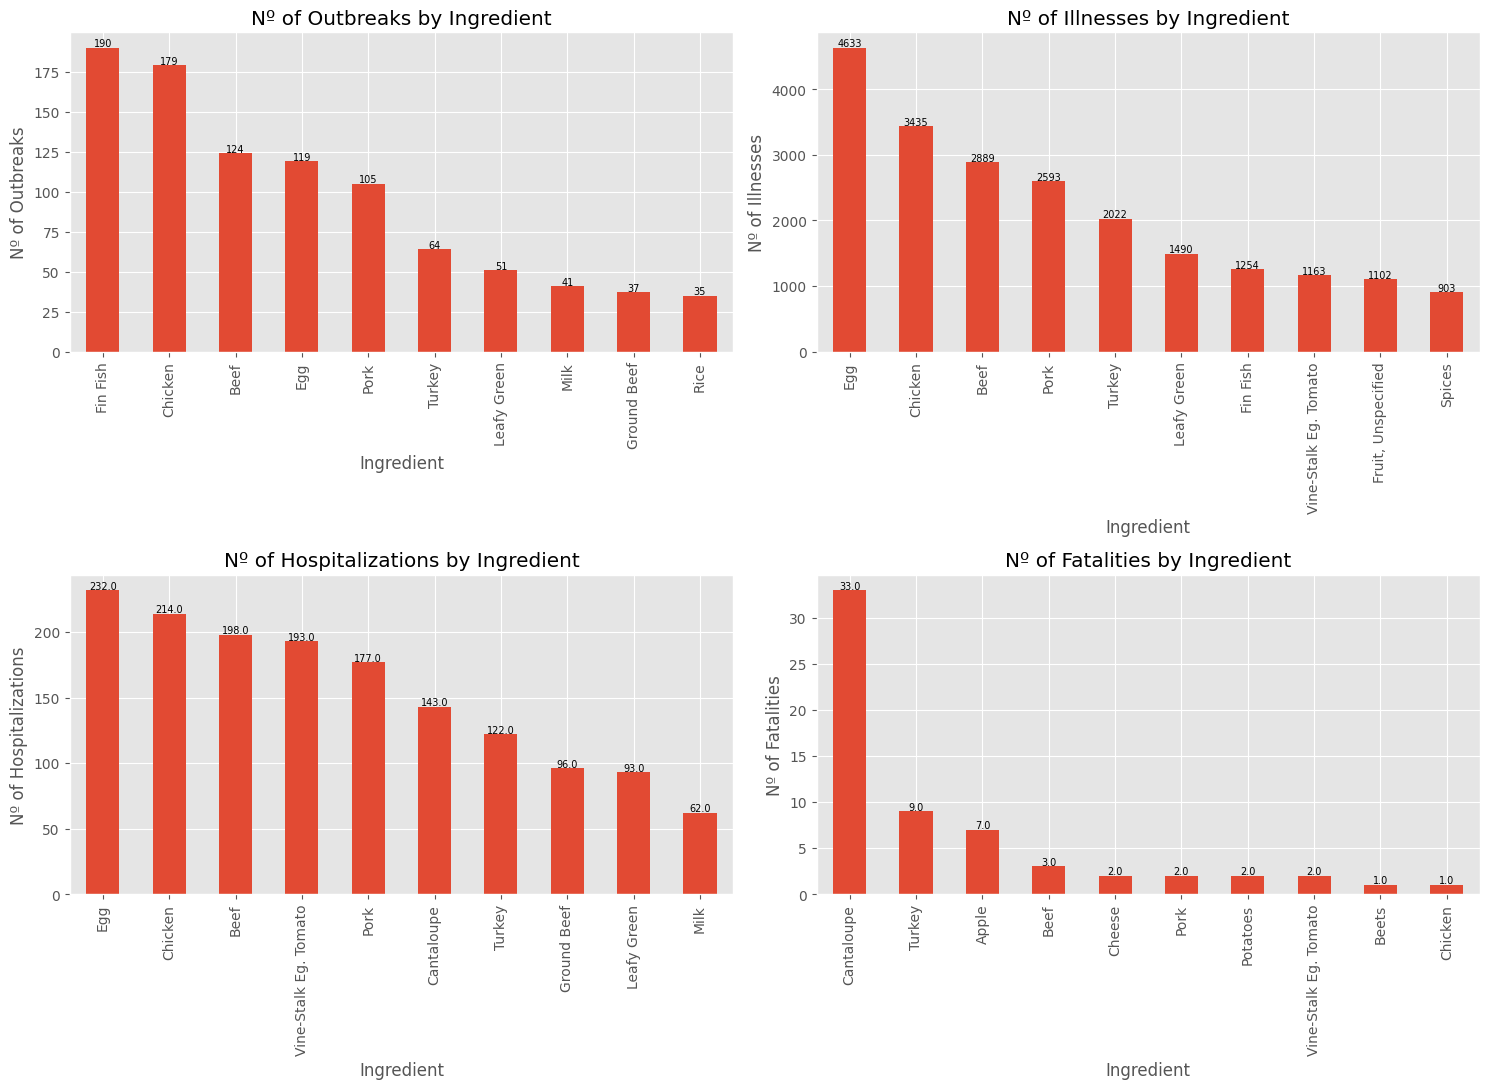

In [129]:
fig=plt.figure(figsize=(15,20))

fig.add_subplot(4,2,1)
plot=top10_ingredient_outbreaks["No_of_Outbreaks"].plot(kind="bar")
plt.title("Nº of Outbreaks by Ingredient")
plt.xlabel("Ingredient")
plt.ylabel("Nº of Outbreaks")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,2)
plot=top10_ingredient_illnesses["No_of_Illnesses"].plot(kind="bar")
plt.title("Nº of Illnesses by Ingredient")
plt.xlabel("Ingredient")
plt.ylabel("Nº of Illnesses")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,3)
plot=top10_ingredient_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Nº of Hospitalizations by Ingredient")
plt.ylabel("Nº of Hospitalizations")
plt.xlabel("Ingredient")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,4)
plot=top10_ingredient_fatal["No_of_Fatalities"].plot(kind="bar")
plt.title("Nº of Fatalities by Ingredient")
plt.ylabel("Nº of Fatalities")
plt.xlabel("Ingredient")
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")


plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.tight_layout()
plt.show()

__Which Contaminant is associated to fin fish, egg and cantalouque__

In [130]:
outbreaks.head()

Date       State                Location  \
0 1998-01-01  California              Restaurant   
1 1998-01-01  California                     NaN   
2 1998-01-01  California              Restaurant   
3 1998-01-01  California              Restaurant   
4 1998-01-01  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0.0  
2               NaN        NaN         35               0.0         0.0  
3               NaN  Confirmed          4               0.0         0.0  
4       Enteritidis  Confirmed         26               3.0         0.0

_Fin Fish_

In [131]:
fin_fish=outbreaks[outbreaks["Ingredient"]=="Fin Fish"]
fin_fish["Species"].value_counts()

Scombroid toxin                                                                                                                 116
Ciguatoxin                                                                                                                       49
Histamine                                                                                                                         5
Chemical or toxin                                                                                                                 3
Norovirus genogroup I                                                                                                             3
Anisakis                                                                                                                          1
Paralytic shellfish poison                                                                                                        1
Bacillus cereus                                                             

In [132]:
fin_fish=fin_fish.groupby("Species").agg(Nº_of_Outbreaks=("Date","count"),
                                                  Nº_of_Illnesses=("Illnesses","sum"),
                                                  Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                                  Nº_of_Fatalities=("Fatalities","sum"))
fin_fish

No_of_Outbreaks  \
Species                                                               
Anisakis                                                          1   
Bacillus cereus                                                   1   
Bacillus cereus; Clostridium perfringens                          1   
Bacterium                                                         1   
Chemical or toxin                                                 3   
Ciguatoxin                                                       49   
Histamine                                                         5   
Norovirus genogroup I                                             3   
Paralytic shellfish poison                                        1   
Rotavirus                                                         1   
Salmonella enterica; Salmonella enterica; Salmo...                1   
Scombroid toxin                                                 116   
Staphylococcus aureus                                             1   

                                                    No_of_Illnesses  \
Species                                                               
Anisakis                                                         14   
Bacillus cereus                                                   3   
Bacillus cereus; Clostridium perfringens                          3   
Bacterium                                                         5   
Chemical or toxin                                                 7   
Ciguatoxin                                                      176   
Histamine                                                        40   
Norovirus genogroup I                                           399   
Paralytic shellfish poison                                        3   
Rotavirus                                                         5   
Salmonella enterica; Salmonella enterica; Salmo...               45   
Scombroid toxin                                                 533   
Staphylococcus aureus                                             3   

                                                    No_of_Hospitalizations  \
Species                                                                      
Anisakis                                                               0.0   
Bacillus cereus                                                        0.0   
Bacillus cereus; Clostridium perfringens                               0.0   
Bacterium                                                              0.0   
Chemical or toxin                                                      0.0   
Ciguatoxin                                                            23.0   
Histamine                                                              3.0   
Norovirus genogroup I                                                  0.0   
Paralytic shellfish poison                                             0.0   
Rotavirus                                                              2.0   
Salmonella enterica; Salmonella enterica; Salmo...                     1.0   
Scombroid toxin                                                       10.0   
Staphylococcus aureus                                                  0.0   

                                                    No_of_Fatalities  
Species                                                               
Anisakis                                                         0.0  
Bacillus cereus                                                  0.0  
Bacillus cereus; Clostridium perfringens                         0.0  
Bacterium                                                        0.0  
Chemical or toxin                                                0.0  
Ciguatoxin                                                       1.0  
Histamine                                                        0.0  
Norovirus genogroup I                                            0.0  
Paralytic shellfish poison             

In [133]:
fin_fish_outbreaks=fin_fish.nlargest(5,"No_of_Outbreaks")
fin_fish_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
fin_fish_outbreaks

No_of_Outbreaks
Species                               
Scombroid toxin                    116
Ciguatoxin                          49
Histamine                            5
Chemical or toxin                    3
Norovirus genogroup I                3

In [134]:
fin_fish.reset_index(inplace=True)

In [135]:
fin_fish["Species"]=fin_fish["Species"].replace("Salmonella enterica; Salmonella enterica; Salmonella enterica; Salmonella enterica; Salmonella enterica; Salmonella enterica","Salmonella enterica")

In [136]:
fin_fish.set_index("Species",inplace=True)

In [137]:
fin_fish_ill=fin_fish.nlargest(5,"No_of_Illnesses")
fin_fish_ill.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
fin_fish_ill

No_of_Illnesses
Species                               
Scombroid toxin                    533
Norovirus genogroup I              399
Ciguatoxin                         176
Salmonella enterica                 45
Histamine                           40

In [138]:
fin_fish_hosp=fin_fish.nlargest(5,"No_of_Hospitalizations")
fin_fish_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
fin_fish_hosp

No_of_Hospitalizations
Species                                    
Ciguatoxin                             23.0
Scombroid toxin                        10.0
Histamine                               3.0
Rotavirus                               2.0
Salmonella enterica                     1.0

In [139]:
fin_fish_fatal=fin_fish.nlargest(5,"No_of_Fatalities")
fin_fish_fatal.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Illnesses"],inplace=True)
fin_fish_fatal

No_of_Fatalities
Species                                                   
Ciguatoxin                                             1.0
Anisakis                                               0.0
Bacillus cereus                                        0.0
Bacillus cereus; Clostridium perfringens               0.0
Bacterium                                              0.0

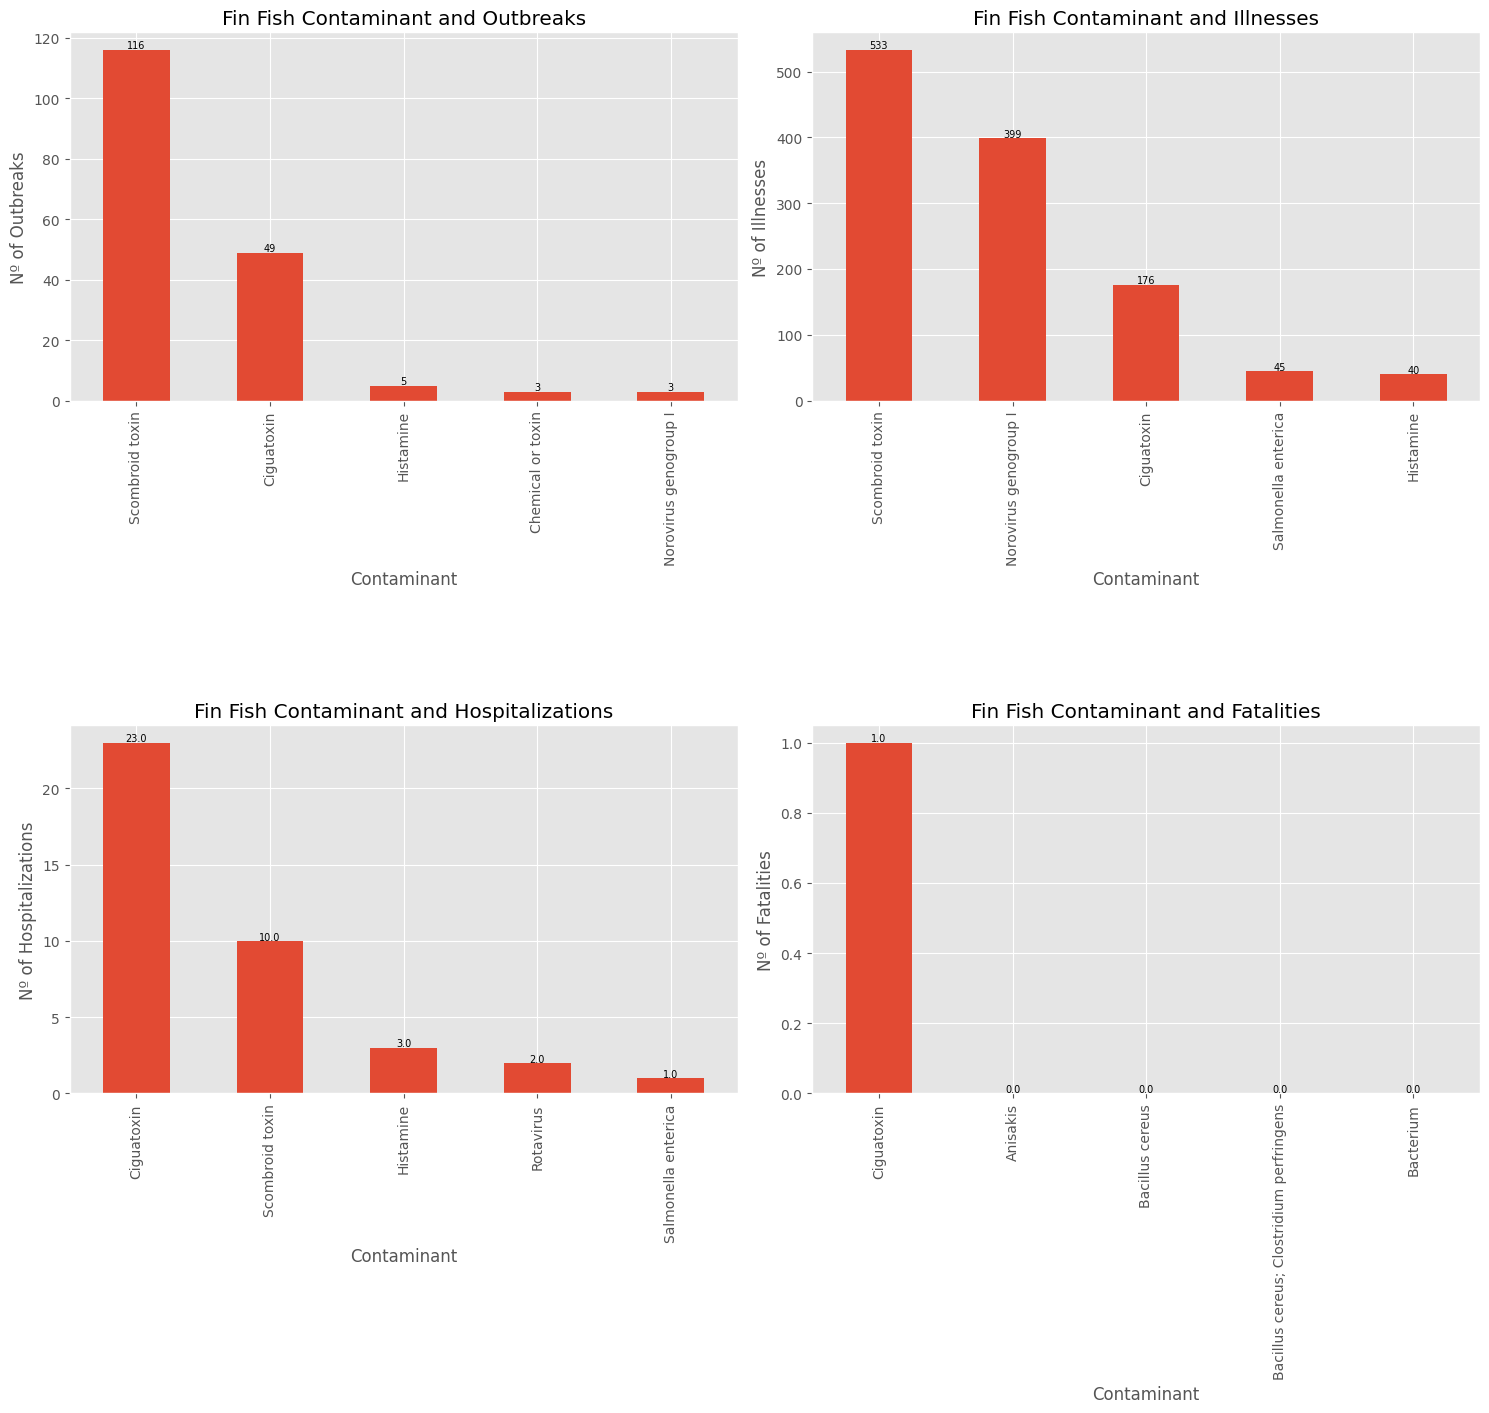

In [140]:
fig=plt.figure(figsize=(15,25))

fig.add_subplot(4,2,1)
plot=fin_fish_outbreaks["No_of_Outbreaks"].plot(kind="bar")
plt.title("Fin Fish Contaminant and Outbreaks")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Outbreaks")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,2)
plot=fin_fish_ill["No_of_Illnesses"].plot(kind="bar")
plt.title("Fin Fish Contaminant and Illnesses")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Illnesses")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,3)
plot=fin_fish_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Fin Fish Contaminant and Hospitalizations")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Hospitalizations")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

fig.add_subplot(4,2,4)
plot=fin_fish_fatal["No_of_Fatalities"].plot(kind="bar")
plt.title("Fin Fish Contaminant and Fatalities")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Fatalities")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.tight_layout()
plt.show()

_Egg_

In [141]:
outbreaks.head()

Date       State                Location  \
0 1998-01-01  California              Restaurant   
1 1998-01-01  California                     NaN   
2 1998-01-01  California              Restaurant   
3 1998-01-01  California              Restaurant   
4 1998-01-01  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0.0  
2               NaN        NaN         35               0.0         0.0  
3               NaN  Confirmed          4               0.0         0.0  
4       Enteritidis  Confirmed         26               3.0         0.0

In [142]:
egg=outbreaks[outbreaks["Ingredient"]=="Egg"]
egg

Date        State            Location  \
94    1998-02-01  Connecticut          Restaurant   
669   1998-07-01      Arizona          Restaurant   
828   1998-08-01       Hawaii                 NaN   
851   1998-08-01     Maryland  Religious Facility   
1319  1999-01-01   California          Restaurant   
...          ...          ...                 ...   
18726 2015-07-01       Hawaii          Restaurant   
18753 2015-07-01         Ohio                 NaN   
18825 2015-08-01         Ohio          Restaurant   
19014 2015-11-01         Utah    Catering Service   
19101 2015-12-01       Oregon                 NaN   

                                                    Food Ingredient  \
94     French Toast, Unspecified; Shell Eggs, Scrambl...        Egg   
669                                       Chile Rellenos        Egg   
828                                          Eggs, Other        Egg   
851                                     Shell Egg, Other        Egg   
1319                                       Eggs Benedict        Egg   
...                                                  ...        ...   
18726                                           Eel, Raw        Egg   
18753                                Ice Cream, Homemade        Egg   
18825                             Pastry, Custard-Filled        Egg   
19014                                    Eggs, Scrambled        Egg   
19101                                             Eggnog        Egg   

                   Species Serotype/Genotype     Status  Illnesses  \
94     Salmonella enterica       Enteritidis  Confirmed         10   
669    Salmonella enterica       Enteritidis  Confirmed         58   
828    Salmonella enterica       Enteritidis  Confirmed         38   
851    Salmonella enterica       Enteritidis  Confirmed         10   
1319   Salmonella enterica       Enteritidis  Confirmed          3   
...                    ...               ...        ...        ...   
18726                  NaN               NaN        NaN          2   
18753  Salmonella enterica       Enteritidis  Confirmed          9   
18825  Salmonella enterica       Enteritidis  Confirmed          9   
19014  Salmonella enterica       Enteritidis  Confirmed          3   
19101  Salmonella enterica       Enteritidis  Confirmed          7   

       Hospitalizations  Fatalities  
94                  0.0         0.0  
669                11.0         0.0  
828                 3.0         0.0  
851                 0.0         0.0  
1319                0.0         0.0  
...                 ...         ...  
18726               0.0         0.0  
18753               2.0         0.0  
18825               1.0         0.0  
19014               0.0         0.0  
19101               0.0         0.0  

[119 rows x 11 columns]

In [143]:
egg=egg.groupby("Species").agg(Nº_of_Outbreaks=("Date","count"),
                              Nº_of_Illnesses=("Illnesses","sum"),
                              Nº_of_Hospitalizations=("Hospitalizations","sum"),
                              Nº_of_Fatalities=("Fatalities","sum"))
egg

No_of_Outbreaks  \
Species                                                               
Clostridium perfringens                                           2   
Norovirus genogroup I                                             1   
Norovirus unknown                                                 1   
Salmonella enterica                                              99   
Salmonella enterica; Salmonella enterica                          1   
Salmonella enterica; Salmonella enterica; Salmo...                1   
Salmonella unknown                                                1   
Shigella sonnei                                                   1   
Staphylococcus aureus                                             2   

                                                    No_of_Illnesses  \
Species                                                               
Clostridium perfringens                                          38   
Norovirus genogroup I                                            17   
Norovirus unknown                                                27   
Salmonella enterica                                            4230   
Salmonella enterica; Salmonella enterica                         46   
Salmonella enterica; Salmonella enterica; Salmo...              157   
Salmonella unknown                                                4   
Shigella sonnei                                                   5   
Staphylococcus aureus                                            28   

                                                    No_of_Hospitalizations  \
Species                                                                      
Clostridium perfringens                                                0.0   
Norovirus genogroup I                                                  0.0   
Norovirus unknown                                                      0.0   
Salmonella enterica                                                  212.0   
Salmonella enterica; Salmonella enterica                              13.0   
Salmonella enterica; Salmonella enterica; Salmo...                     1.0   
Salmonella unknown                                                     0.0   
Shigella sonnei                                                        1.0   
Staphylococcus aureus                                                  4.0   

                                                    No_of_Fatalities  
Species                                                               
Clostridium perfringens                                          0.0  
Norovirus genogroup I                                            0.0  
Norovirus unknown                                                0.0  
Salmonella enterica                                              0.0  
Salmonella enterica; Salmonella enterica                         0.0  
Salmonella enterica; Salmonella enterica; Salmo...               0.0  
Salmonella unknown                                               0.0  
Shigella sonnei                                                  0.0  
Staphylococcus aureus                                            0.0

In [144]:
egg_outbreaks=egg.nlargest(5,"No_of_Outbreaks")
egg_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
egg_outbreaks

No_of_Outbreaks
Species                                 
Salmonella enterica                   99
Clostridium perfringens                2
Staphylococcus aureus                  2
Norovirus genogroup I                  1
Norovirus unknown                      1

In [145]:
egg_ill=egg.nlargest(5,"No_of_Illnesses")
egg_ill.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
egg_ill

No_of_Illnesses
Species                                                            
Salmonella enterica                                            4230
Salmonella enterica; Salmonella enterica; Salmo...              157
Salmonella enterica; Salmonella enterica                         46
Clostridium perfringens                                          38
Staphylococcus aureus                                            28

In [146]:
egg_hosp=egg.nlargest(5,"No_of_Hospitalizations")
egg_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
egg_hosp

No_of_Hospitalizations
Species                                                                   
Salmonella enterica                                                  212.0
Salmonella enterica; Salmonella enterica                              13.0
Staphylococcus aureus                                                  4.0
Salmonella enterica; Salmonella enterica; Salmo...                     1.0
Shigella sonnei                                                        1.0

In [147]:
egg_fatal=egg.nlargest(5,"No_of_Fatalities")
egg_fatal.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Hospitalizations"],inplace=True)
egg_fatal

No_of_Fatalities
Species                                                   
Clostridium perfringens                                0.0
Norovirus genogroup I                                  0.0
Norovirus unknown                                      0.0
Salmonella enterica                                    0.0
Salmonella enterica; Salmonella enterica               0.0

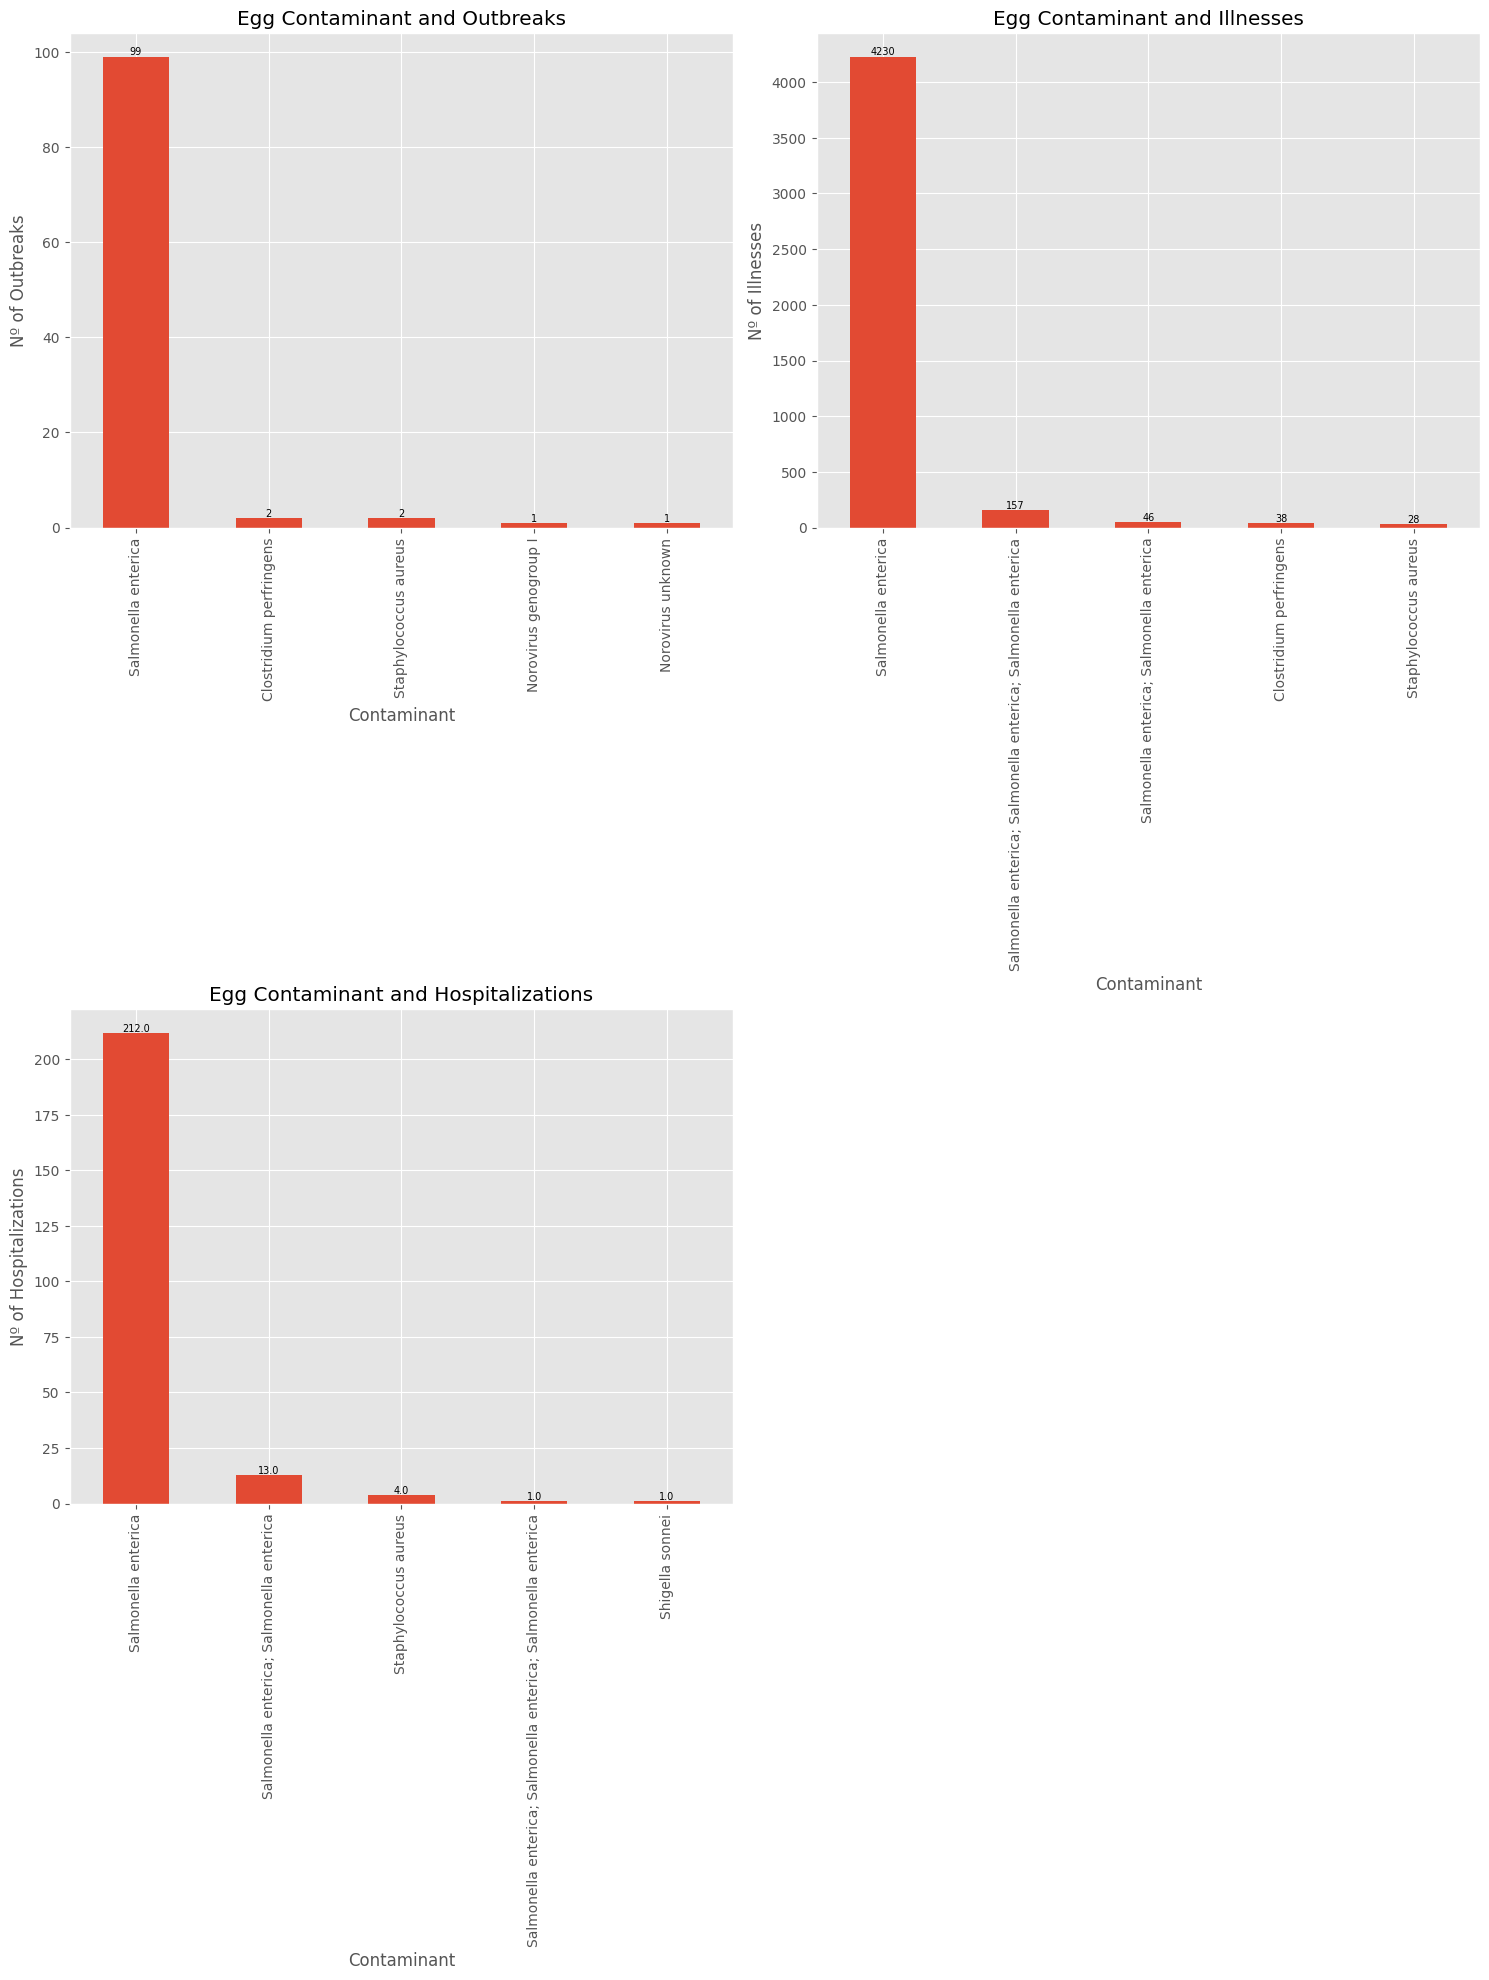

In [148]:
fig=plt.figure(figsize=(15,25))

fig.add_subplot(3,2,1)
plot=egg_outbreaks["No_of_Outbreaks"].plot(kind="bar")
plt.title("Egg Contaminant and Outbreaks")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Outbreaks")
for i in plot.patches:
    plot.annotate(i.get_height(),
                     (i.get_x()+i.get_width()/2,i.get_height()),
                      ha="center",va="baseline",fontsize=7,
                      color="black",xytext=(0,1),
                      textcoords="offset points")


fig.add_subplot(3,2,2)
plot=egg_ill["No_of_Illnesses"].plot(kind="bar")
plt.title("Egg Contaminant and Illnesses")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Illnesses")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                   ha="center",va="baseline",fontsize=7,
                   color="black",xytext=(0,1),
                   textcoords="offset points")

fig.add_subplot(3,2,3)
plot=egg_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Egg Contaminant and Hospitalizations")
plt.xlabel("Contaminant")
plt.ylabel("Nº of Hospitalizations")
for i in plot.patches:
    plot.annotate(i.get_height(),
                 (i.get_x()+i.get_width()/2,i.get_height()),
                  ha="center",va="baseline",fontsize=7,
                  color="black",xytext=(0,1),
                  textcoords="offset points")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.tight_layout()
plt.show()

_Cantaloupe_

In [149]:
outbreaks.head()

Date       State                Location  \
0 1998-01-01  California              Restaurant   
1 1998-01-01  California                     NaN   
2 1998-01-01  California              Restaurant   
3 1998-01-01  California              Restaurant   
4 1998-01-01  California  Private Home/Residence   

                                Food Ingredient              Species  \
0                                NaN        NaN                  NaN   
1                            Custard        NaN                  NaN   
2                                NaN        NaN                  NaN   
3                          Fish, Ahi        NaN      Scombroid toxin   
4  Lasagna, Unspecified; Eggs, Other        NaN  Salmonella enterica   

  Serotype/Genotype     Status  Illnesses  Hospitalizations  Fatalities  
0               NaN        NaN         20               0.0         0.0  
1               NaN        NaN        112               0.0         0.0  
2               NaN        NaN         35               0.0         0.0  
3               NaN  Confirmed          4               0.0         0.0  
4       Enteritidis  Confirmed         26               3.0         0.0

In [150]:
cantaloupe=outbreaks[outbreaks["Ingredient"]=="Cantaloupe"]
cantaloupe

Date       State                Location        Food  Ingredient  \
15329 2011-07-01  Multistate  Private Home/Residence  Cantaloupe  Cantaloupe   
16853 2013-05-01   Minnesota              Restaurant  Cantaloupe  Cantaloupe   

                      Species Serotype/Genotype     Status  Illnesses  \
15329  Listeria monocytogenes               NaN  Confirmed        147   
16853               Norovirus               NaN  Suspected         59   

       Hospitalizations  Fatalities  
15329             143.0        33.0  
16853               0.0         0.0

In [151]:
cantaloupe=cantaloupe.groupby("Species").agg(Nº_of_Outbreaks=("Date","count"),
                                             Nº_of_Illnesses=("Illnesses","sum"),
                                             Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                             Nº_of_Fatalities=("Fatalities","sum"))
cantaloupe

No_of_Outbreaks  No_of_Illnesses  \
Species                                                    
Listeria monocytogenes                1              147   
Norovirus                             1               59   

                        No_of_Hospitalizations  No_of_Fatalities  
Species                                                           
Listeria monocytogenes                   143.0              33.0  
Norovirus                                  0.0               0.0

__Which location is associated to the higher number of outbreaks, hospitalizaions, illnesses and fatalities__

In [152]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

In [153]:
outbreaks["Location"].value_counts()

Restaurant                                                               10448
Private Home/Residence                                                    1681
Catering Service                                                          1089
Banquet Facility                                                           367
Fast Food Restaurant                                                       366
                                                                         ...  
Private Home/Residence; Grocery Store; Child Daycare                         1
Restaurant; Private Home/Residence; Catering Service; Fair/Festival          1
Restaurant; Private Home/Residence; Grocery Store; Religious Facility        1
Child Daycare; Religious Facility                                            1
Hotel/Motel                                                                  1
Name: Location, Length: 161, dtype: int64

In [154]:
location=outbreaks.groupby("Location").agg(Nº_of_Outbreaks=("Date","count"),
                                           Nº_of_Illnesses=("Illnesses","sum"),
                                           Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                           Nº_of_Fatalities=("Fatalities","sum"))
location

No_of_Outbreaks  \
Location                                                              
Banquet Facility                                                367   
Banquet Facility; Catering Service                               16   
Banquet Facility; Catering Service; Grocery Store                 1   
Banquet Facility; Catering Service; Religious F...                1   
Banquet Facility; Grocery Store                                   2   
...                                                             ...   
School/College/University; Camp                                   2   
School/College/University; Prison/Jail                            1   
School/College/University; Religious Facility                     1   
Ship/Boat                                                         1   
Unknown                                                         355   

                                                    No_of_Illnesses  \
Location                                                              
Banquet Facility                                              12272   
Banquet Facility; Catering Service                              529   
Banquet Facility; Catering Service; Grocery Store                14   
Banquet Facility; Catering Service; Religious F...               19   
Banquet Facility; Grocery Store                                  29   
...                                                             ...   
School/College/University; Camp                                  77   
School/College/University; Prison/Jail                           67   
School/College/University; Religious Facility                    28   
Ship/Boat                                                         3   
Unknown                                                        7648   

                                                    No_of_Hospitalizations  \
Location                                                                     
Banquet Facility                                                      83.0   
Banquet Facility; Catering Service                                     3.0   
Banquet Facility; Catering Service; Grocery Store                      1.0   
Banquet Facility; Catering Service; Religious F...                     3.0   
Banquet Facility; Grocery Store                                        0.0   
...                                                                    ...   
School/College/University; Camp                                       11.0   
School/College/University; Prison/Jail                                 0.0   
School/College/University; Religious Facility                          0.0   
Ship/Boat                                                              0.0   
Unknown                                                              389.0   

                                                    No_of_Fatalities  
Location                                                              
Banquet Facility                                                 1.0  
Banquet Facility; Catering Service                               0.0  
Banquet Facility; Catering Service; Grocery Store                0.0  
Banquet Facility; Catering Service; Religious F...               0.0  
Banquet Facility; Grocery Store                                  0.0  
...                                                              ...  
School/College/University; Camp                                  0.0  
School/College/University; Prison/Jail                           0.0  
School/College/University; Religious Facility                    0.0  
Ship/Boat                                                        0.0  
Unknown                                                          5.0  

[161 rows x 4 columns]

In [155]:
location_outbreaks=location.nlargest(10,"No_of_Outbreaks")
location_outbreaks.drop(columns=["No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
location_outbreaks

No_of_Outbreaks
Location                                           
Restaurant                                    10448
Private Home/Residence                         1681
Catering Service                               1089
Banquet Facility                                367
Fast Food Restaurant                            366
Unknown                                         355
School/College/University                       354
Grocery Store                                   301
Restaurant; Private Home/Residence              205
Prison/Jail                                     193

In [156]:
location_ill=location.nlargest(10,"No_of_Illnesses")
location_ill.drop(columns=["No_of_Outbreaks","No_of_Hospitalizations","No_of_Fatalities"],inplace=True)
location_ill

No_of_Illnesses
Location                                              
Restaurant                                      131970
Catering Service                                 36044
Private Home/Residence                           22564
Prison/Jail                                      20608
School/College/University                        19910
Banquet Facility                                 12272
Unknown                                           7648
Nursing Home/Assisted Living Facility             5625
Restaurant; Catering Service                      5243
Fast Food Restaurant                              4336

In [157]:
location_hosp=location.nlargest(10,"No_of_Hospitalizations")
location_hosp.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Fatalities"],inplace=True)
location_hosp

No_of_Hospitalizations
Location                                                     
Restaurant                                             4665.0
Private Home/Residence                                 2526.0
Catering Service                                        412.0
Unknown                                                 389.0
Fast Food Restaurant                                    329.0
Nursing Home/Assisted Living Facility                   293.0
Restaurant; Private Home/Residence                      292.0
Grocery Store                                           276.0
School/College/University                               213.0
Religious Facility                                      199.0

In [158]:
location_fatal=location.nlargest(10,"No_of_Fatalities")
location_fatal.drop(columns=["No_of_Outbreaks","No_of_Illnesses","No_of_Hospitalizations"],inplace=True)
location_fatal

No_of_Fatalities
Location                                                    
Private Home/Residence                                  82.0
Restaurant                                              62.0
Nursing Home/Assisted Living Facility                   44.0
Grocery Store                                           11.0
Hospital                                                 6.0
Unknown                                                  5.0
Catering Service                                         4.0
Prison/Jail                                              4.0
Private Home/Residence; Religious Facility               3.0
Restaurant; Catering Service                             3.0

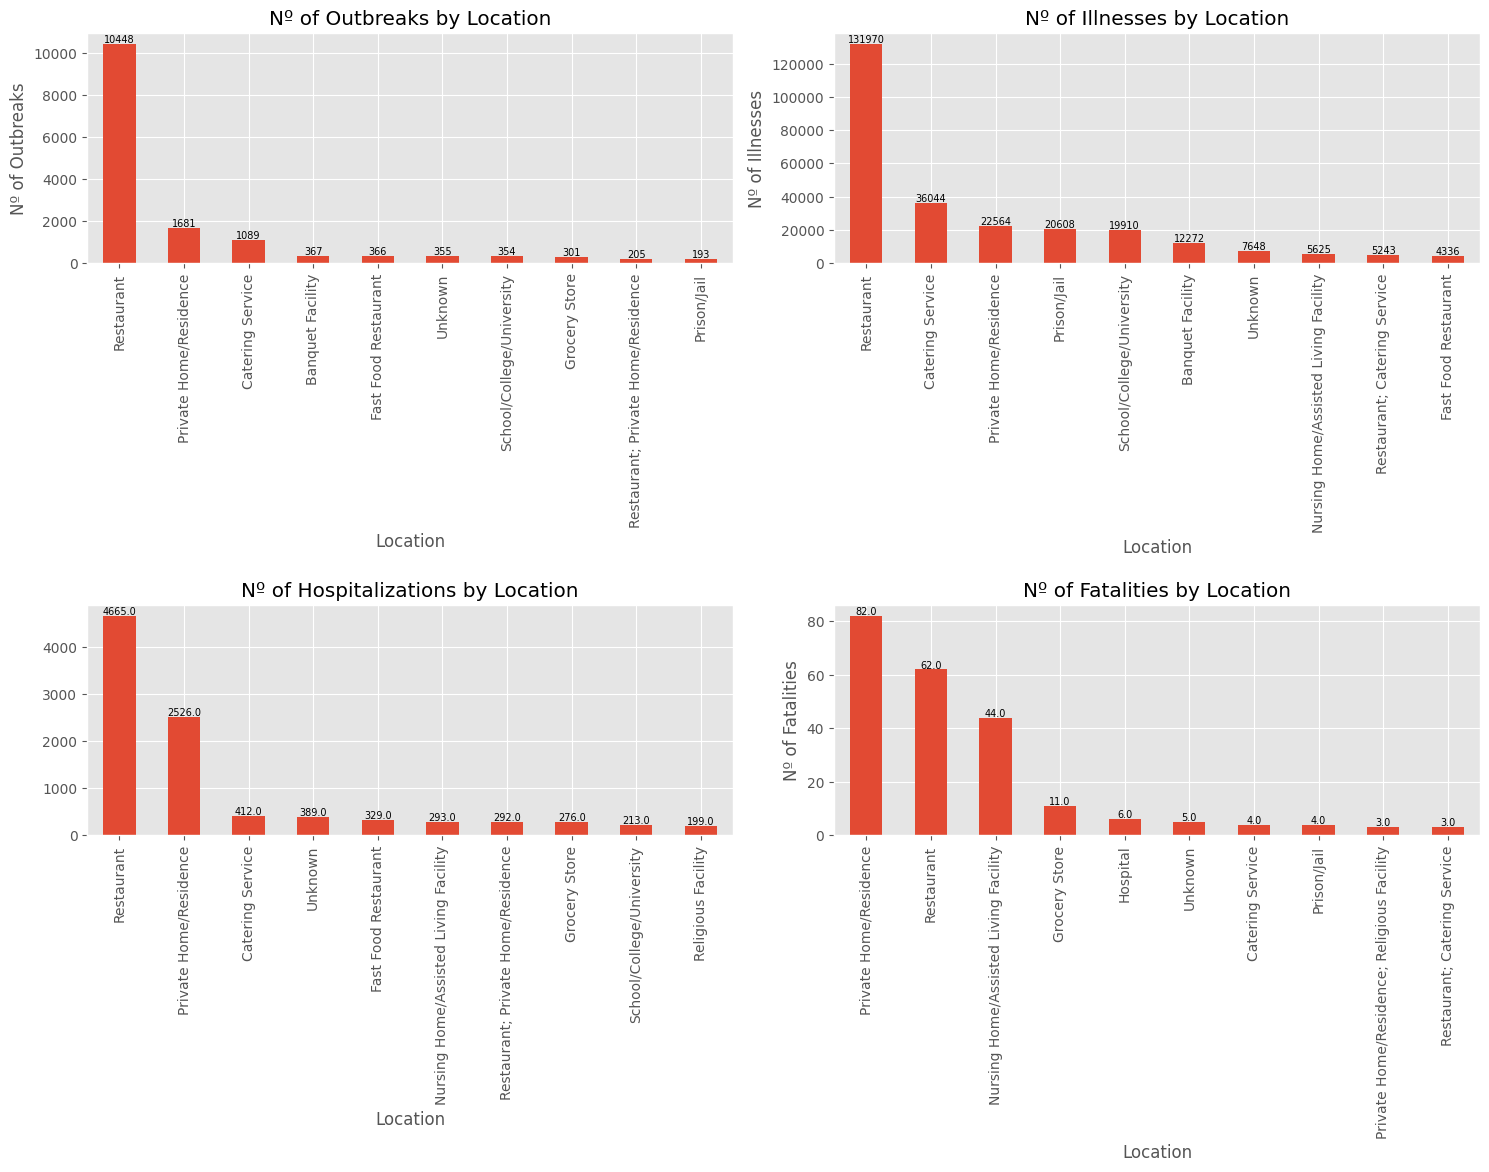

In [159]:
fig=plt.figure(figsize=(15,20))

fig.add_subplot(4,2,1)
plot=location_outbreaks["No_of_Outbreaks"].plot(kind="bar")
plt.title("Nº of Outbreaks by Location")
plt.ylabel("Nº of Outbreaks")
plt.xlabel("Location")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                   ha="center",va="baseline",fontsize=7,
                   color="black",xytext=(0,1),
                   textcoords="offset points")

fig.add_subplot(4,2,2)
plot=location_ill["No_of_Illnesses"].plot(kind="bar")
plt.title("Nº of Illnesses by Location")
plt.ylabel("Nº of Illnesses")
plt.xlabel("Location")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                   ha="center",va="baseline",fontsize=7,
                   color="black",xytext=(0,1),
                   textcoords="offset points")

fig.add_subplot(4,2,3)
plot=location_hosp["No_of_Hospitalizations"].plot(kind="bar")
plt.title("Nº of Hospitalizations by Location")
plt.xlabel("Location")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                   ha="center",va="baseline",fontsize=7,
                   color="black",xytext=(0,1),
                   textcoords="offset points")

fig.add_subplot(4,2,4)
plot=location_fatal["No_of_Fatalities"].plot(kind="bar")
plt.title("Nº of Fatalities by Location")
plt.ylabel("Nº of Fatalities")
plt.xlabel("Location")
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x()+i.get_width()/2,i.get_height()),
                   ha="center",va="baseline",fontsize=7,
                   color="black",xytext=(0,1),
                   textcoords="offset points")

plt.subplots_adjust(wspace=0.2,hspace=0.4)
plt.tight_layout()
plt.show()

# Fifth Goal:
>Which variable is a related to foodborne diseases?

>Let´s add Meat Consumption Variable

>Linear Regression Model

In [160]:
meat=pd.read_csv("/content/drive/MyDrive/Dataset/Dataset/meat_consumption_worldwide.csv",parse_dates=["TIME"])

In [161]:
meat

LOCATION SUBJECT     MEASURE       TIME      Value
0          AUS    BEEF      KG_CAP 1991-01-01  27.721815
1          AUS    BEEF      KG_CAP 1992-01-01  26.199591
2          AUS    BEEF      KG_CAP 1993-01-01  26.169094
3          AUS    BEEF      KG_CAP 1994-01-01  25.456134
4          AUS    BEEF      KG_CAP 1995-01-01  25.340226
...        ...     ...         ...        ...        ...
13755      MYS   SHEEP  THND_TONNE 2022-01-01  44.154151
13756      MYS   SHEEP  THND_TONNE 2023-01-01  44.897588
13757      MYS   SHEEP  THND_TONNE 2024-01-01  45.612107
13758      MYS   SHEEP  THND_TONNE 2025-01-01  46.325312
13759      MYS   SHEEP  THND_TONNE 2026-01-01  47.047207

[13760 rows x 5 columns]

In [162]:
outbreaks

Date       State                               Location  \
0     1998-01-01  California                             Restaurant   
1     1998-01-01  California                                    NaN   
2     1998-01-01  California                             Restaurant   
3     1998-01-01  California                             Restaurant   
4     1998-01-01  California                 Private Home/Residence   
...          ...         ...                                    ...   
19114 2015-12-01   Wisconsin                             Restaurant   
19115 2015-12-01   Wisconsin                 Private Home/Residence   
19116 2015-12-01   Wisconsin  Nursing Home/Assisted Living Facility   
19117 2015-12-01   Wisconsin                   Fast Food Restaurant   
19118 2015-12-01     Wyoming                                    NaN   

                                    Food Ingredient                 Species  \
0                                    NaN        NaN                     NaN   
1                                Custard        NaN                     NaN   
2                                    NaN        NaN                     NaN   
3                              Fish, Ahi        NaN         Scombroid toxin   
4      Lasagna, Unspecified; Eggs, Other        NaN     Salmonella enterica   
...                                  ...        ...                     ...   
19114                                NaN        NaN  Norovirus genogroup II   
19115                              Salsa        NaN  Norovirus genogroup II   
19116                                NaN        NaN  Norovirus genogroup II   
19117                                NaN        NaN  Norovirus genogroup II   
19118                                NaN        NaN                     NaN   

            Serotype/Genotype     Status  Illnesses  Hospitalizations  \
0                         NaN        NaN         20               0.0   
1                         NaN        NaN        112               0.0   
2                         NaN        NaN         35               0.0   
3                         NaN  Confirmed          4               0.0   
4                 Enteritidis  Confirmed         26               3.0   
...                       ...        ...        ...               ...   
19114                  GII_14  Confirmed          4               0.0   
19115                   GII_2  Confirmed         16               0.0   
19116  GII_17 Kawasaki (2014)  Confirmed         43               3.0   
19117                   GII_2  Confirmed          5               0.0   
19118                     NaN        NaN          3               0.0   

       Fatalities  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
19114         0.0  
19115         0.0  
19116         0.0  
19117         0.0  
19118         0.0  

[19119 rows x 11 columns]

__Prepare the dataset__

In [163]:
outbreaks_by_year=outbreaks.groupby(pd.Grouper(key="Date",freq="Y")).agg(Nº_of_Outbreaks=("Date","count"),
                                                                        Nº_of_Illnesses=("Illnesses","sum"),
                                                                        Nº_of_Hospitalizations=("Hospitalizations","sum"),
                                                                        Nº_of_Fatalities=("Fatalities","sum"))
outbreaks_by_year.reset_index(inplace=True)
outbreaks_by_year

Date  No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
0  1998-12-31             1317            27156                   886.0   
1  1999-12-31             1337            24899                   598.0   
2  2000-12-31             1405            26033                   728.0   
3  2001-12-31             1248            25192                   665.0   
4  2002-12-31             1320            24939                   734.0   
5  2003-12-31             1089            23079                   687.0   
6  2004-12-31             1328            29034                   779.0   
7  2005-12-31              959            19761                   592.0   
8  2006-12-31             1255            28656                  1170.0   
9  2007-12-31             1088            20970                   877.0   
10 2008-12-31             1029            23089                  1250.0   
11 2009-12-31              669            13813                   546.0   
12 2010-12-31              853            15893                   662.0   
13 2011-12-31              796            14278                   952.0   
14 2012-12-31              833            14995                   859.0   
15 2013-12-31              824            13431                  1051.0   
16 2014-12-31              872            13295                   722.0   
17 2015-12-31              897            15018                   923.0   

    No_of_Fatalities  
0               33.0  
1               10.0  
2               22.0  
3               11.0  
4               14.0  
5               24.0  
6               22.0  
7                8.0  
8               10.0  
9               18.0  
10              22.0  
11               7.0  
12              20.0  
13              45.0  
14              20.0  
15              14.0  
16              23.0  
17              14.0

In [164]:
outbreaks_by_year["Year"]=outbreaks_by_year["Date"].dt.year

In [165]:
outbreaks_by_year

Date  No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
0  1998-12-31             1317            27156                   886.0   
1  1999-12-31             1337            24899                   598.0   
2  2000-12-31             1405            26033                   728.0   
3  2001-12-31             1248            25192                   665.0   
4  2002-12-31             1320            24939                   734.0   
5  2003-12-31             1089            23079                   687.0   
6  2004-12-31             1328            29034                   779.0   
7  2005-12-31              959            19761                   592.0   
8  2006-12-31             1255            28656                  1170.0   
9  2007-12-31             1088            20970                   877.0   
10 2008-12-31             1029            23089                  1250.0   
11 2009-12-31              669            13813                   546.0   
12 2010-12-31              853            15893                   662.0   
13 2011-12-31              796            14278                   952.0   
14 2012-12-31              833            14995                   859.0   
15 2013-12-31              824            13431                  1051.0   
16 2014-12-31              872            13295                   722.0   
17 2015-12-31              897            15018                   923.0   

    No_of_Fatalities  Year  
0               33.0  1998  
1               10.0  1999  
2               22.0  2000  
3               11.0  2001  
4               14.0  2002  
5               24.0  2003  
6               22.0  2004  
7                8.0  2005  
8               10.0  2006  
9               18.0  2007  
10              22.0  2008  
11               7.0  2009  
12              20.0  2010  
13              45.0  2011  
14              20.0  2012  
15              14.0  2013  
16              23.0  2014  
17              14.0  2015

In [166]:
outbreaks_by_year.drop(columns=["Date"],inplace=True)

In [167]:
outbreaks_by_year=outbreaks_by_year[["Year","No_of_Outbreaks","No_of_Illnesses","No_of_Hospitalizations","No_of_Fatalities"]]
outbreaks_by_year.set_index("Year",inplace=True)

In [168]:
outbreaks_by_year

No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Year                                                             
1998             1317            27156                   886.0   
1999             1337            24899                   598.0   
2000             1405            26033                   728.0   
2001             1248            25192                   665.0   
2002             1320            24939                   734.0   
2003             1089            23079                   687.0   
2004             1328            29034                   779.0   
2005              959            19761                   592.0   
2006             1255            28656                  1170.0   
2007             1088            20970                   877.0   
2008             1029            23089                  1250.0   
2009              669            13813                   546.0   
2010              853            15893                   662.0   
2011              796            14278                   952.0   
2012              833            14995                   859.0   
2013              824            13431                  1051.0   
2014              872            13295                   722.0   
2015              897            15018                   923.0   

      No_of_Fatalities  
Year                    
1998              33.0  
1999              10.0  
2000              22.0  
2001              11.0  
2002              14.0  
2003              24.0  
2004              22.0  
2005               8.0  
2006              10.0  
2007              18.0  
2008              22.0  
2009               7.0  
2010              20.0  
2011              45.0  
2012              20.0  
2013              14.0  
2014              23.0  
2015              14.0

In [169]:
meat["LOCATION"].value_counts()

MYS      296
THA      296
IDN      296
IRN      296
ISR      296
VNM      296
CAN      296
MOZ      296
NGA      296
PAK      296
PRY      296
PER      296
PHL      296
URY      296
SAU      296
ZAF      296
SDN      296
IND      296
HTI      296
GHA      296
DZA      296
JPN      296
SSA      296
MEX      296
NZL      296
TUR      296
USA      296
TZA      296
ZMB      296
BGD      296
BRA      296
CHL      296
COL      296
EGY      296
CHN      294
ARG      294
AUS      292
KOR      292
UKR      288
KAZ      288
ETH      284
RUS      278
BRICS    278
EU28     276
OECD     274
WLD      262
NOR      148
CHE      148
Name: LOCATION, dtype: int64

In [170]:
meat=meat[meat["LOCATION"]=="USA"]
meat= meat[meat['MEASURE'] == 'THND_TONNE']
meat

LOCATION  SUBJECT     MEASURE       TIME         Value
8377       USA     BEEF  THND_TONNE 1990-01-01  11047.424713
8378       USA     BEEF  THND_TONNE 1991-01-01  11076.047690
8379       USA     BEEF  THND_TONNE 1992-01-01  11145.845962
8380       USA     BEEF  THND_TONNE 1993-01-01  11018.632690
8381       USA     BEEF  THND_TONNE 1994-01-01  11527.610200
...        ...      ...         ...        ...           ...
10170      USA  POULTRY  THND_TONNE 2022-01-01  18588.777809
10171      USA  POULTRY  THND_TONNE 2023-01-01  18746.715531
10172      USA  POULTRY  THND_TONNE 2024-01-01  18885.738021
10173      USA  POULTRY  THND_TONNE 2025-01-01  19005.702190
10174      USA  POULTRY  THND_TONNE 2026-01-01  19046.522746

[148 rows x 5 columns]

In [171]:
meat["Year"]=meat["TIME"].dt.year

In [172]:
meat

LOCATION  SUBJECT     MEASURE       TIME         Value  Year
8377       USA     BEEF  THND_TONNE 1990-01-01  11047.424713  1990
8378       USA     BEEF  THND_TONNE 1991-01-01  11076.047690  1991
8379       USA     BEEF  THND_TONNE 1992-01-01  11145.845962  1992
8380       USA     BEEF  THND_TONNE 1993-01-01  11018.632690  1993
8381       USA     BEEF  THND_TONNE 1994-01-01  11527.610200  1994
...        ...      ...         ...        ...           ...   ...
10170      USA  POULTRY  THND_TONNE 2022-01-01  18588.777809  2022
10171      USA  POULTRY  THND_TONNE 2023-01-01  18746.715531  2023
10172      USA  POULTRY  THND_TONNE 2024-01-01  18885.738021  2024
10173      USA  POULTRY  THND_TONNE 2025-01-01  19005.702190  2025
10174      USA  POULTRY  THND_TONNE 2026-01-01  19046.522746  2026

[148 rows x 6 columns]

In [173]:
meat=meat[["Year","Value"]]
meat.set_index("Year",inplace=True)
meat

Value
Year              
1990  11047.424713
1991  11076.047690
1992  11145.845962
1993  11018.632690
1994  11527.610200
...            ...
2022  18588.777809
2023  18746.715531
2024  18885.738021
2025  19005.702190
2026  19046.522746

[148 rows x 1 columns]

In [174]:
meat= meat.loc[(meat.index >= 1998) & (meat.index <= 2015)]

In [175]:
meat=meat.rename(columns={"Value":"Meat Consumption (THND_TONNE)"})

In [176]:
# Merging outbreaks and meat dataset
data=outbreaks_by_year.merge(meat,how="left",left_on="Year",right_on="Year")

In [177]:
data

No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
Year                                                             
1998             1317            27156                   886.0   
1998             1317            27156                   886.0   
1998             1317            27156                   886.0   
1998             1317            27156                   886.0   
1999             1337            24899                   598.0   
...               ...              ...                     ...   
2014              872            13295                   722.0   
2015              897            15018                   923.0   
2015              897            15018                   923.0   
2015              897            15018                   923.0   
2015              897            15018                   923.0   

      No_of_Fatalities  Meat Consumption (THND_TONNE)  
Year                                                   
1998              33.0                   12112.117562  
1998              33.0                     163.293447  
1998              33.0                    8304.832579  
1998              33.0                   12618.954740  
1999              10.0                   12400.691408  
...                ...                            ...  
2014              23.0                   16313.922581  
2015              14.0                   11405.230727  
2015              14.0                     152.607819  
2015              14.0                    9341.292377  
2015              14.0                   17423.410837  

[72 rows x 5 columns]

__Person Correlation Coefficient (R^2):__
> Summarizes the strngth and direction of the linear association between two quantitative vaiables.
>It works for numeric data.

Scale of Correlation Coeficient:

0<=r<=0.19---Very Low Correlation

0.2<=r<=0.59---Low Correlation

0.4<=r<=0.59 Moderate Correlation

0.6<=r<=0.79---High Correlation

0.8<=r<=1.0---Very High Correlation

In [178]:
data.corr()

No_of_Outbreaks  No_of_Illnesses  \
No_of_Outbreaks                       1.000000         0.937126   
No_of_Illnesses                       0.937126         1.000000   
No_of_Hospitalizations               -0.025037         0.071020   
No_of_Fatalities                     -0.049146        -0.071556   
Meat Consumption (THND_TONNE)        -0.025257        -0.017617   

                               No_of_Hospitalizations  No_of_Fatalities  \
No_of_Outbreaks                             -0.025037         -0.049146   
No_of_Illnesses                              0.071020         -0.071556   
No_of_Hospitalizations                       1.000000          0.272187   
No_of_Fatalities                             0.272187          1.000000   
Meat Consumption (THND_TONNE)                0.016655         -0.013160   

                               Meat Consumption (THND_TONNE)  
No_of_Outbreaks                                    -0.025257  
No_of_Illnesses                                    -0.017617  
No_of_Hospitalizations                              0.016655  
No_of_Fatalities                                   -0.013160  
Meat Consumption (THND_TONNE)                       1.000000

In [179]:
data.reset_index(inplace=True)
data.drop(columns=["Year"],inplace=True)

<Figure size 1000x800 with 0 Axes>

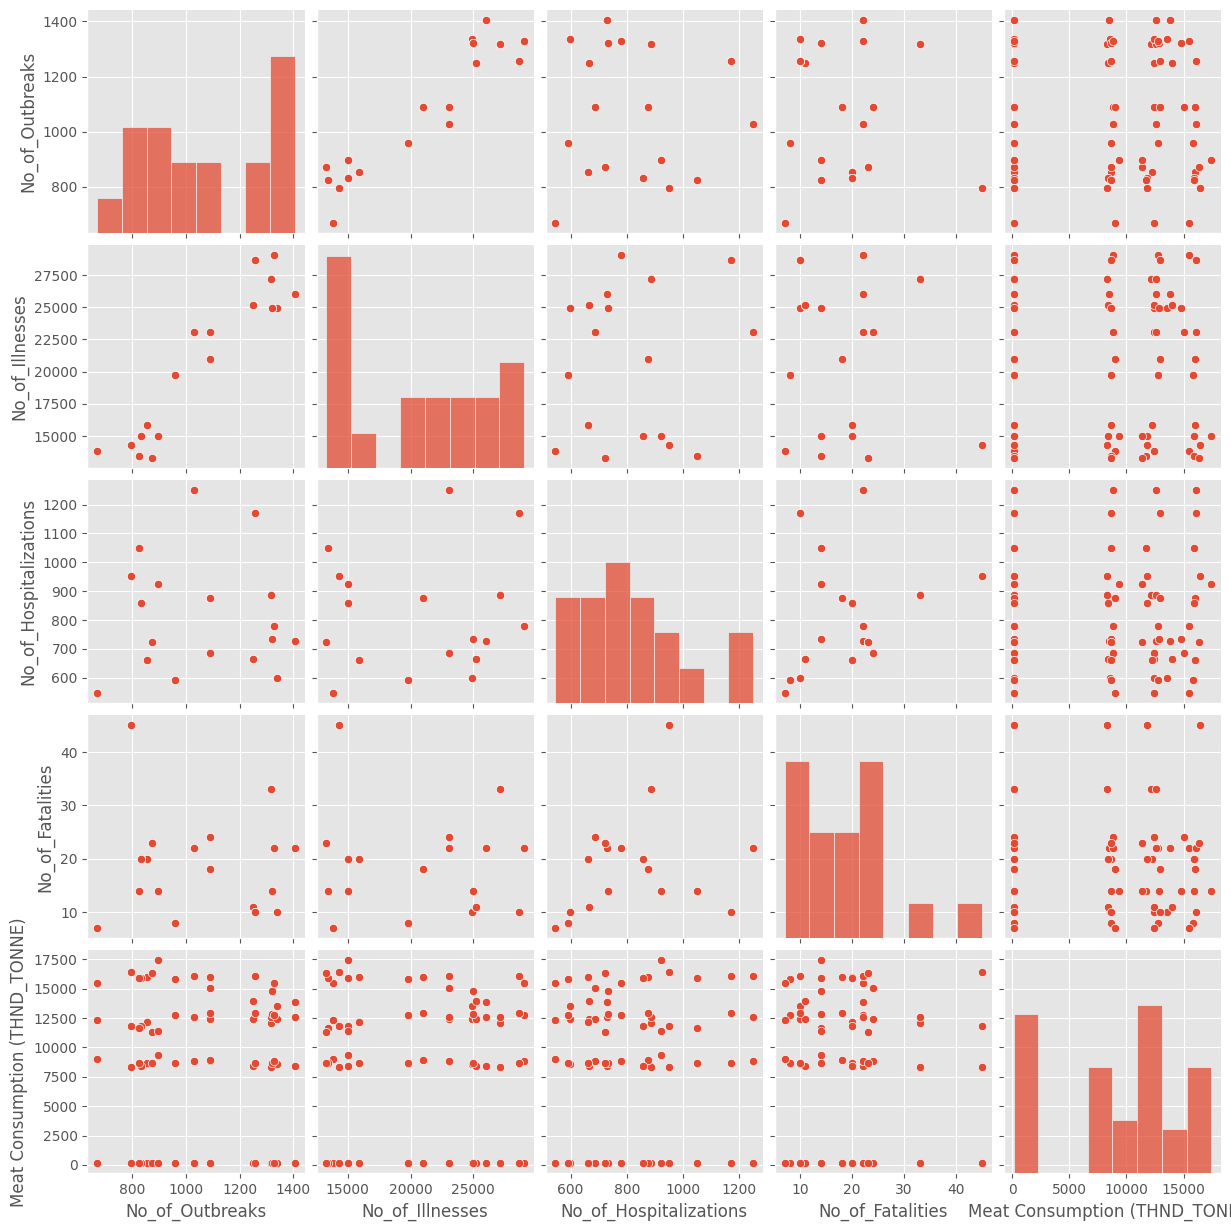

In [180]:
plt.figure(figsize=(10,8))
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Nº of Outbreaks and Nº of Illnesses Correlation')

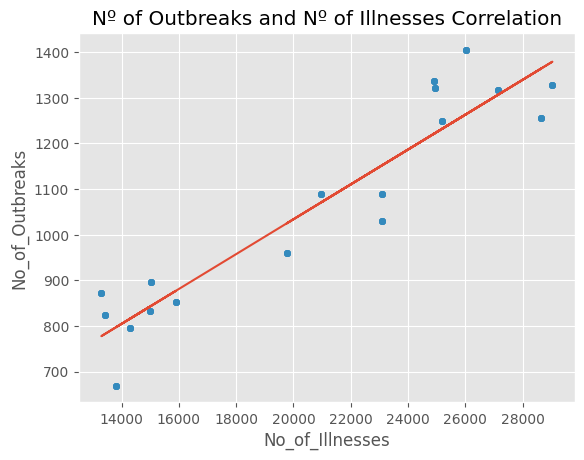

In [181]:
#Scatter Plot
data.plot(kind="scatter",x="No_of_Illnesses",y="No_of_Outbreaks")

#calculate equation for trendline
z=np.polyfit(data["No_of_Illnesses"],data["No_of_Outbreaks"],1)
p=np.poly1d(z)

#add trendline to plot
plt.plot(data["No_of_Illnesses"],p(data["No_of_Illnesses"]))
plt.title("Nº of Outbreaks and Nº of Illnesses Correlation")

As we can see the there is a Very High Correlation between the No_of_Outbreaks and the No_of_Illnesses.
We can say that 93.7126% of the No_of_Outbreaks can be explaned by the No_of_Illnesses.

__Simple Linear Regression:__

>X---"No_of_Illnesses"

>y---"No_of_Outbreaks"

In [182]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [183]:
data

No_of_Outbreaks  No_of_Illnesses  No_of_Hospitalizations  \
0              1317            27156                   886.0   
1              1317            27156                   886.0   
2              1317            27156                   886.0   
3              1317            27156                   886.0   
4              1337            24899                   598.0   
..              ...              ...                     ...   
67              872            13295                   722.0   
68              897            15018                   923.0   
69              897            15018                   923.0   
70              897            15018                   923.0   
71              897            15018                   923.0   

    No_of_Fatalities  Meat Consumption (THND_TONNE)  
0               33.0                   12112.117562  
1               33.0                     163.293447  
2               33.0                    8304.832579  
3               33.0                   12618.954740  
4               10.0                   12400.691408  
..               ...                            ...  
67              23.0                   16313.922581  
68              14.0                   11405.230727  
69              14.0                     152.607819  
70              14.0                    9341.292377  
71              14.0                   17423.410837  

[72 rows x 5 columns]

In [184]:
X=data.iloc[:,1].values
y=data.iloc[:,0].values

In [185]:
X=X.reshape(-1, 1)
y=y.reshape(-1,1)

In [186]:
#Create the Simple Linear Regression Model
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [187]:
#coefficients
regressor.intercept_

array([269.74562127])

In [188]:
#slope
regressor.coef_

array([[0.0381858]])

Text(0.5, 1.0, 'Real y vs Adjusted y')

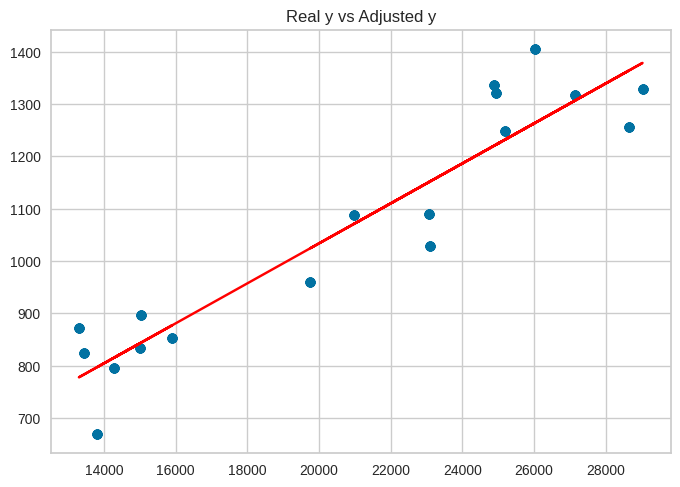

In [189]:
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.title("Real y vs Adjusted y")

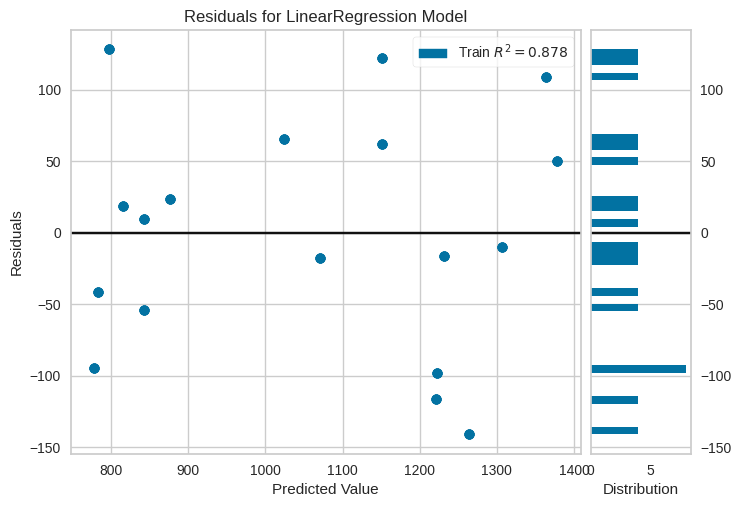

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [190]:
visualizador = ResidualsPlot(regressor)
visualizador.fit(X, y)
visualizador.poof()

In [191]:
# Let´s do Some Predictions
# Let´s predict the nº of outbreaks if nº of illnesses=200
regressor.predict([[200]])

array([[277.38278061]])

In [192]:
# If nº of illnesses=200 the nº of outbreaks will be nearly 278